# Learning Chaos with Physical Neural Networks, Part II

<!-- What if I were to tell you that chaotic systems are predictable?  -->

I have a soft spot for studying chaotic systems. In the prehistoric times of 2013 BC (Before Covid), Wenbo Tang and I wrote on a [paper](https://aip.scitation.org/doi/pdf/10.1063/1.4923250) on the influcene of turbulence, such as eddies and streams, in the chaotic mixing of nutrient-phytoplankton-zooplankton systems. Recently, I've become interested in applications of machine learning and neural networks in the domain of physics and I came across this [fun Quanta article](https://www.quantamagazine.org/machine-learnings-amazing-ability-to-predict-chaos-20180418/) on

> how well can chaotic systems be modeled with physics inspired neural networks?

I wanted to study this question for a simple chaotic problem, the Driven and Damped Harmonic Oscillator, implementing the ***Physics Informed Neural Networks*** architecure I read about on [Ben's blog](https://benmoseley.blog/blog/). This is a continuation of [***my first post***](https://www.dhuality.com/2022/04/20/Physical-Neural-Networks-The-Harmonic-Oscillator.html) but applied to dynamical systems displaying chaotic structures in the `Python`. 

## Conditions on Chaos 

Most classical (or even quantum) systems studied by a budding theoretical physicist in an academic setting are often idealized toy models with exact analytic solutions. In reality, however, there are limitations to the predictability of any system. The weather, the stock market, or whether or not you will beat traffic to make it to work on time are all example of real-life systems which depend on conditions which you have no control over. 

These are examples of **chaotic** systems. At first glance, it might seem as though chaotic systems are unpredictable or indeterministic, but this is not true. Even chaotic systems have underlying patterns. What makes a system chaotic is[^1]  [^1]: S. H. Strogatz, Nonlinear Dynamics $\textit{\&}$ Chaos.

1. behavior which is non-repetitive, or aperiodic, and 
2. the system is  highly sensitive to starting, or initial, conditions.

If both requirements are met, then we say the system is deterministically chaotic. For example, let's study the damped harmonic oscillator with and without a driving force term. Mathematically, the objective is to solve the system

$$
\begin{equation}
    \ddot{\chi}(t) + 2\delta\,\dot{\chi}(t) + \omega^2\, \chi(t) = a \sin(\omega_d t)
\end{equation}
$$ 

subject to some initial data $(\chi(0)=\xi,\dot{\chi}(0)=\zeta)$ where $\delta = \mu/2m$, $\omega^2 = k/m$, $(a,\omega_d)$ are the acceleration and frequency of the driving. Of course, there are exact solutions (which can be found in the details below) but it is more instructive to study a representative set of solutions numerically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
# Import ODE Solver and Set TeX Presets in plots
from scipy.integrate import odeint
plt.rcParams['text.usetex'] = True
fs = 16

In [2]:
# Code to solve the Driven+Damped Harmonic Oscillator
# Inputs: Vector, Initial conditions, and Parameters 

# Setting Initial Conditions (starting equ)
xi = 1
zeta = 0
V0 = [xi, zeta]

# Set Parameters
a = 20
omegad = 17

# Construct the time domain
Nt = 1000
t = np.linspace(0., 3., Nt)

# Construct a system of coupled 1st order ODEs
# DHO returns the differential equations for 
# \phi = \dot{chi}, and \dot{\phi} = -2*\delta*\phi - \omega^2\chi
def DHO(V,t,delta,omega):
    return [V[1], -2*delta*V[1] - (omega**2)*V[0]]

def DHOwD(V,t,delta,omega,a,omegad):
    return [V[1], -2*delta*V[1] - (omega**2)*V[0] + a*np.sin(omegad * t)]

# The solution to the differential equation
# given various values of omega, delta

# Solutions for the DHO without Damping
Vsol1_20 = odeint(DHO, V0, t, args=(1,20))
Vsol2_20 = odeint(DHO, V0, t, args=(2,20))
Vsol3_20 = odeint(DHO, V0, t, args=(3,20))

chisol1_20 = Vsol1_20[:,0]
chisol2_20 = Vsol2_20[:,0]
chisol3_20 = Vsol3_20[:,0]

chisolvel1_20 = Vsol1_20[:,1]
chisolvel2_20 = Vsol2_20[:,1]
chisolvel3_20 = Vsol3_20[:,1]

# Solutions for the DHO with Damping

VsolwD1_20 = odeint(DHOwD, V0, t, args=(1,20,a,omegad))
VsolwD2_20 = odeint(DHOwD, V0, t, args=(2,20,a,omegad))
VsolwD3_20 = odeint(DHOwD, V0, t, args=(3,20,a,omegad))

chisolwD1_20 = VsolwD1_20[:,0]
chisolwD2_20 = VsolwD2_20[:,0]
chisolwD3_20 = VsolwD3_20[:,0]

chisolwDvel1_20 = VsolwD1_20[:,1]
chisolwDvel2_20 = VsolwD2_20[:,1]
chisolwDvel3_20 = VsolwD3_20[:,1]

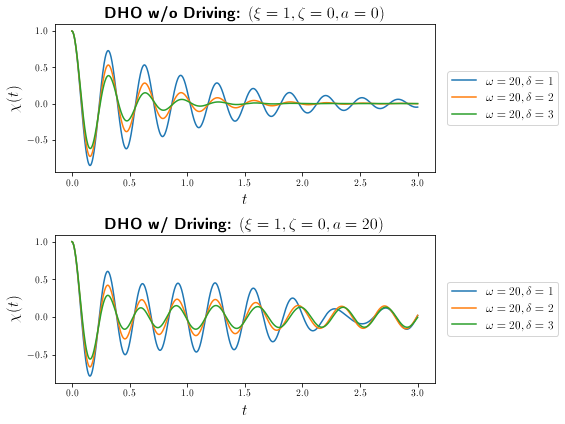

In [3]:
fig, (DHO, DHOwD) = plt.subplots(2,figsize=(8,6), tight_layout = True)

# Code for plot WITHOUT damping
DHO.plot(t,chisol1_20,label='$\omega = 20,\delta =1$')
DHO.plot(t,chisol2_20,label='$\omega = 20,\delta =2$')
DHO.plot(t,chisol3_20,label='$\omega = 20,\delta =3$')
DHO.set_xlabel(r'$t$', fontsize = fs)
DHO.set_ylabel('$\\chi(t)$',fontsize = fs)
DHO.set_title('\\textbf{DHO w/o Driving: $(\\xi=1, \\zeta=0, a = 0)$}',fontsize=fs)
DHO.legend(fontsize = 12,bbox_to_anchor=(1.34,.5),loc = "center right")

# Code for plot WITH damping (wD)
DHOwD.plot(t,chisolwD1_20,label='$\omega = 20,\delta =1$')
DHOwD.plot(t,chisolwD2_20,label='$\omega = 20,\delta =2$')
DHOwD.plot(t,chisolwD3_20,label='$\omega = 20,\delta =3$')
DHOwD.set_xlabel(r'$t$', fontsize = fs)
DHOwD.set_ylabel('$\\chi(t)$',fontsize = fs)
DHOwD.set_title('\\textbf{DHO w/ Driving: $(\\xi=1, \\zeta=0, a =20)$}',fontsize=fs)
DHOwD.legend(fontsize = 12,bbox_to_anchor=(1.34,.5),loc = "center right")

plt.savefig('DHO_test.png',dpi=500)

What distinguishes the two systems is the long time behavior. Whereas for the DHO without driving, all trajectories sink to a fixed point $|{\chi(t_\infty)}|=0$ fixed point, the DHO with driving has a non-repetitive, aperiodic behavior at late times. In fact, we can see this behavior better by studying the phase space of solutions.

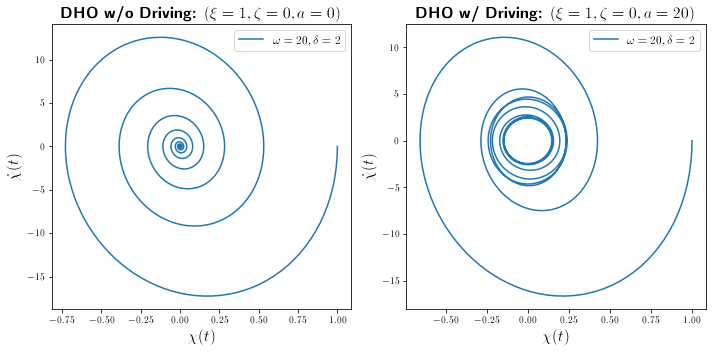

In [4]:
# Plot the velocity
chisolvel2_20 = Vsol2_20[:,1]
chisolwDvel2_20 = VsolwD2_20[:,1]

fig, (DHO_vel, DHOwD_vel) = plt.subplots(1,2,figsize=(10,5), tight_layout = True)

# Code for plot WITHOUT damping
DHO_vel.plot(chisol2_20,chisolvel2_20,label='$\omega = 20,\delta =2$')
DHO_vel.set_xlabel('$\\chi(t)$', fontsize = fs)
DHO_vel.set_ylabel('$\\dot{\\chi}(t)$',fontsize = fs)
DHO_vel.set_title('\\textbf{DHO w/o Driving: $(\\xi=1, \\zeta=0, a = 0)$}',fontsize=fs)
DHO_vel.legend(fontsize = 12,loc = "upper right")

# Code for plot WITH damping (wD)
DHOwD_vel.plot(chisolwD2_20,chisolwDvel2_20,label='$\omega = 20,\delta =2$')
DHOwD_vel.set_xlabel('$\\chi(t)$', fontsize = fs)
DHOwD_vel.set_ylabel('$\\dot{\\chi}(t)$',fontsize = fs)
DHOwD_vel.set_title('\\textbf{DHO w/ Driving: $(\\xi=1, \\zeta=0, a =20)$}',fontsize=fs)
DHOwD_vel.legend(fontsize = 12,loc = "upper right")

plt.savefig('DHOvel_test.png',dpi=500)

Clearly we see that there is a fixed point attractor at $(\chi(t_\infty)=0,\dot{\chi}(t_\infty)=0)$ when no driving is present. Whereas, for the DHO with driving, there is a circle defined by 
$$
\chi(t)^2 + \dot{\chi}(t)^2 \approx c^2\ \ \ \text{ for }\ \ \ t\approx t_\infty
$$
in the phase plot. Hence, the harmonic oscillator with driving and damping will never settle onto a stationary equilibrium state at late times - a classic marker of chaotic systems.

## Implementing Neural Networks

Although we were fortunate to have an exact analytic solution to this chaotic system, in general more complex chaotic systems do not admit exact solutions and novel numerical methods must be used to gain insight into the physics.

Recently, neural networks have found success in [modeling and predicting](https://www.quantamagazine.org/machine-learnings-amazing-ability-to-predict-chaos-20180418/) universal chaotic behavior. The major advancement in studying chaotic systems is to deploy the PINN architecture. The basic idea of any neural networks is to minimize the following function 
$$
J(\theta) =  \frac{1}{2m}\sum_{i=1}^m{\rm err}(\theta,x_i,y_i) + f_{\rm reg}(\theta)
$$
where $f_{\rm reg}(\theta)$ is a contribution used to regularize the error between the trail inputs $x_i$ with weights $\theta$ and the outputs $y_i$ given as the training data. While the choice for the ${\rm err}$ function is set by the regression scheme, PINN's deviate from other neural networks by injecting physics into the regularizer term $f_{\rm reg}$. This is done by taking the ordinary or partial differential equation describing the system (if there is one), and replacing $f_{\rm reg}(\theta)$ with 
$$
f_{\rm reg}(\theta; {\rm model\ parameters}) = \frac{1}{n}\sum_{i=1}^{n}\left(\mathbb{D}\chi_i(x_i,\theta)\right)^2.
$$
where $\mathbb{D}$ is the differential operator. Then by minimizing the cost function via $\min J(\theta)$, one essentially teaches the neural network the physics in the problem. Let's see how this works in practice, I'll return to the damped and driven harmonic oscillator with
$$
\begin{align*}
    {\rm err}(\theta,x_i,y_i) &= \left(\chi_\text{NN}(\theta,x_i) - y_i\right)^2,\newline
f_{\rm reg}(\theta; \delta,\omega,a,\omega_d) &= \frac{1}{n}\sum_{i=1}^{n}\left(\left[\frac{d^2}{dt^2}+2\delta\frac{d}{dt}+\omega^2-a\sin(\omega_d t)\right]\chi_\text{NN}(x_i,\theta)\right)^2.
\end{align*}
$$

## Making the Neural Network Module 

In [5]:
# Import Python's Neural Network Framework
import torch
import torch.nn as nn

# model parameters
delta = 2
omega = 20
mu, k = 2*delta, omega**2

# model choice (either chisol or chisolwD)delta_omega
model_choice = chisolwD2_20

# Note: one must convert chisolwD2 from a numpy array
# to the torch nn type.
x = torch.linspace(0., 3., Nt).view(-1,1)
y = torch.from_numpy(model_choice).view(-1,1)

# choice of sample size
step_size = 20

x_data = x[0:400:step_size]
y_data_temp = torch.from_numpy(model_choice[0:400:step_size]).view(-1,1)

# Note: using .from_numpy converts numpy array to float64
# one must convert this torch type to float32 via:
y_data = y_data_temp.to(torch.float32)

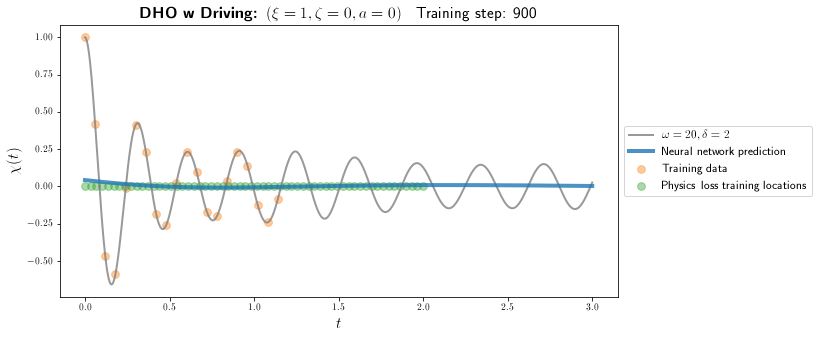

tensor(0.1143, grad_fn=<MeanBackward0>) tensor(0.0201, grad_fn=<MulBackward0>)


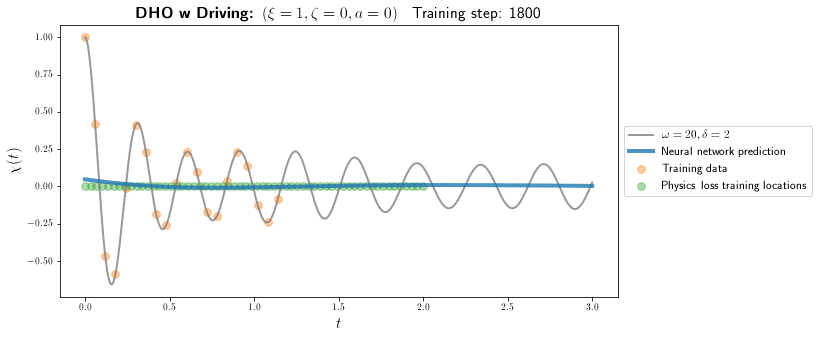

tensor(0.1139, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MulBackward0>)


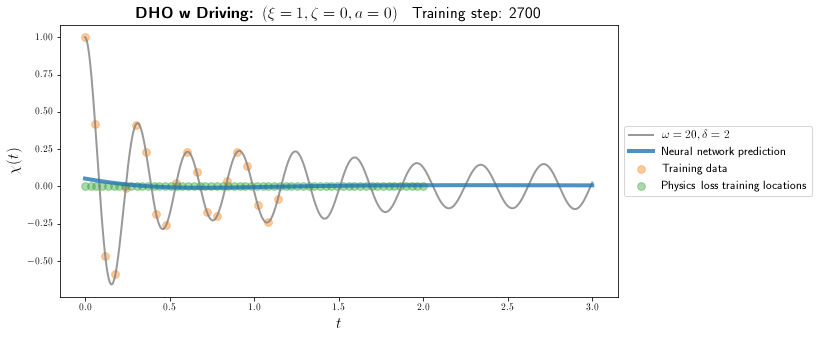

tensor(0.1134, grad_fn=<MeanBackward0>) tensor(0.0203, grad_fn=<MulBackward0>)


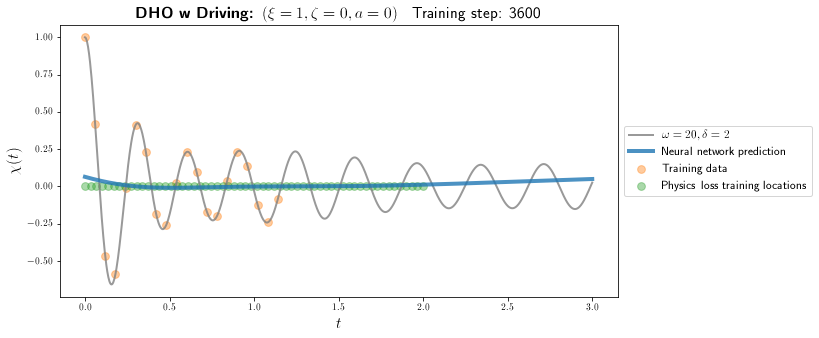

tensor(0.1121, grad_fn=<MeanBackward0>) tensor(0.0200, grad_fn=<MulBackward0>)


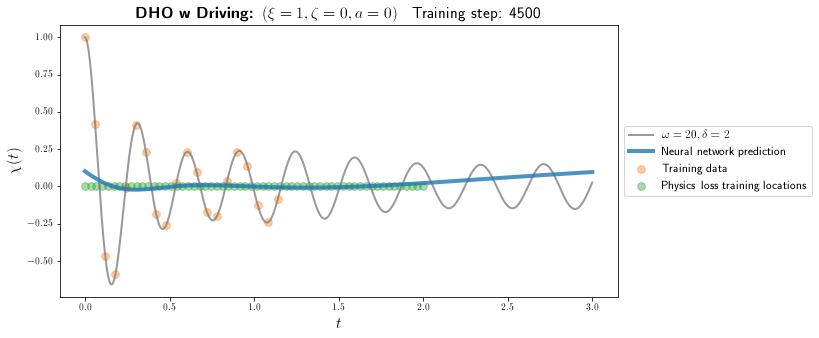

tensor(0.1074, grad_fn=<MeanBackward0>) tensor(0.0211, grad_fn=<MulBackward0>)


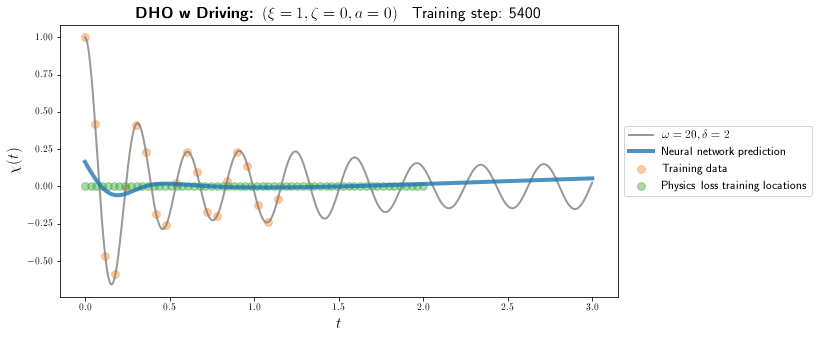

tensor(0.0975, grad_fn=<MeanBackward0>) tensor(0.0250, grad_fn=<MulBackward0>)


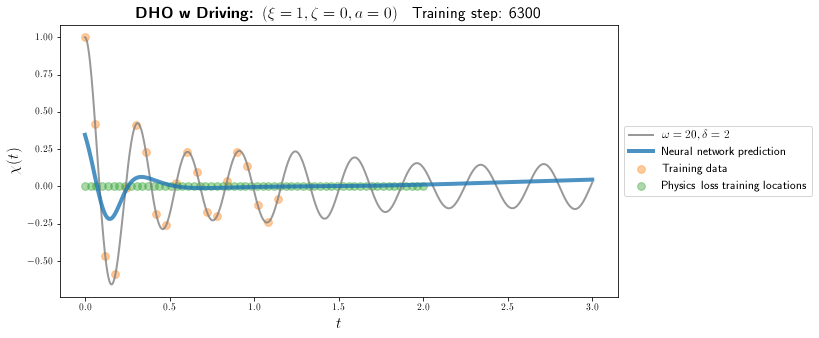

tensor(0.0686, grad_fn=<MeanBackward0>) tensor(0.0332, grad_fn=<MulBackward0>)


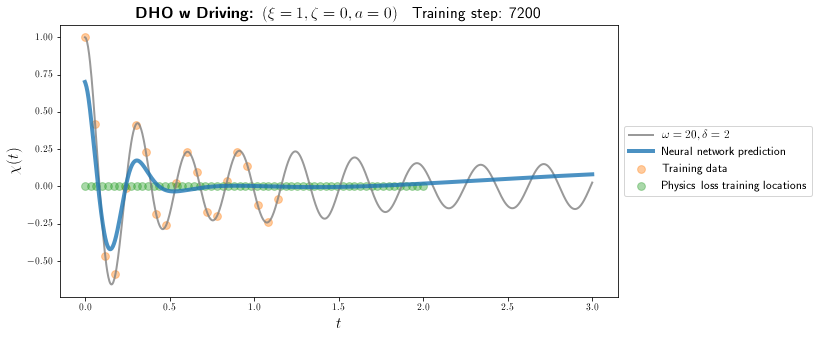

tensor(0.0341, grad_fn=<MeanBackward0>) tensor(0.0252, grad_fn=<MulBackward0>)


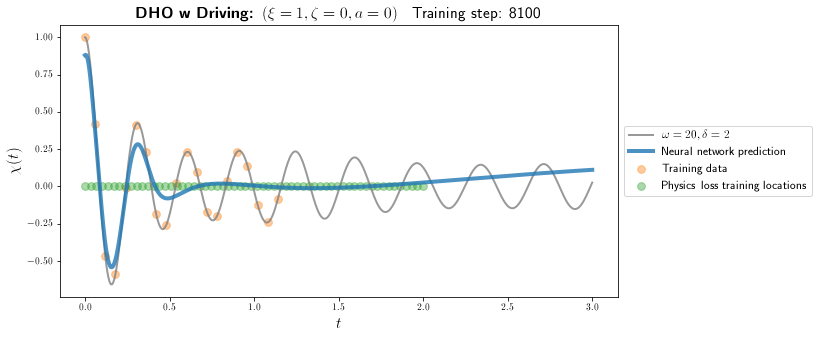

tensor(0.0213, grad_fn=<MeanBackward0>) tensor(0.0241, grad_fn=<MulBackward0>)


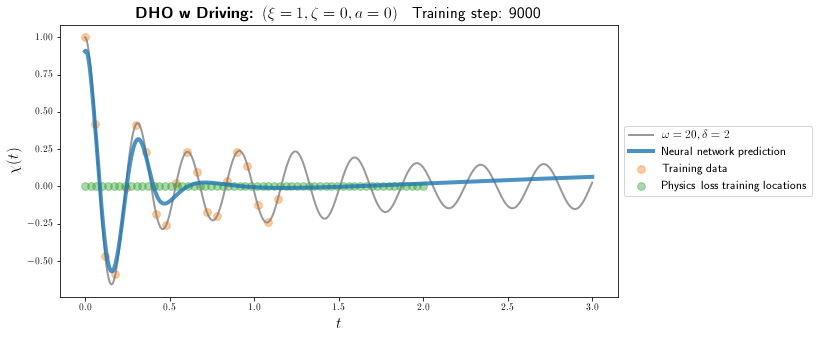

tensor(0.0187, grad_fn=<MeanBackward0>) tensor(0.0227, grad_fn=<MulBackward0>)


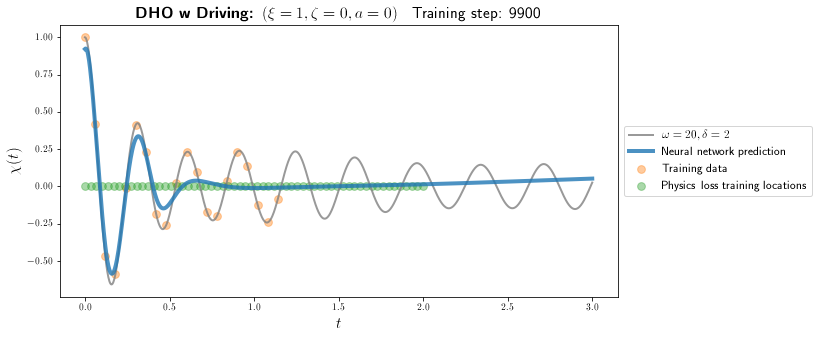

tensor(0.0170, grad_fn=<MeanBackward0>) tensor(0.0223, grad_fn=<MulBackward0>)


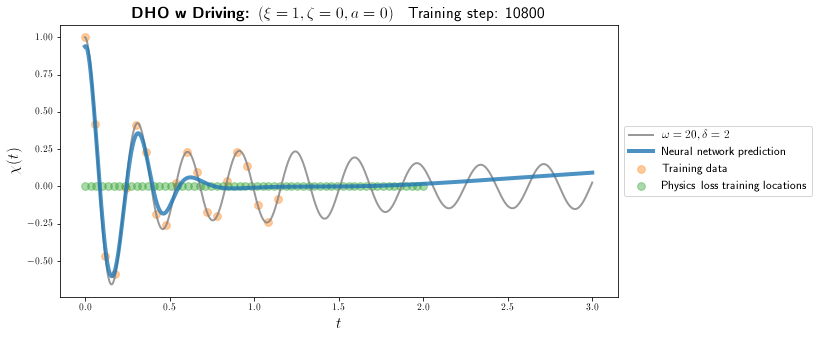

tensor(0.0151, grad_fn=<MeanBackward0>) tensor(0.0213, grad_fn=<MulBackward0>)


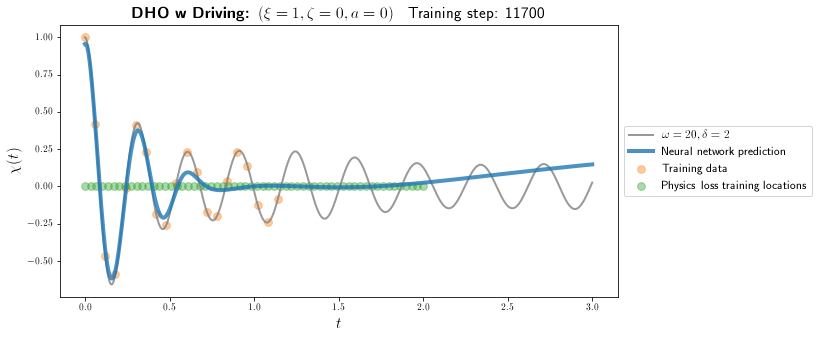

tensor(0.0133, grad_fn=<MeanBackward0>) tensor(0.0205, grad_fn=<MulBackward0>)


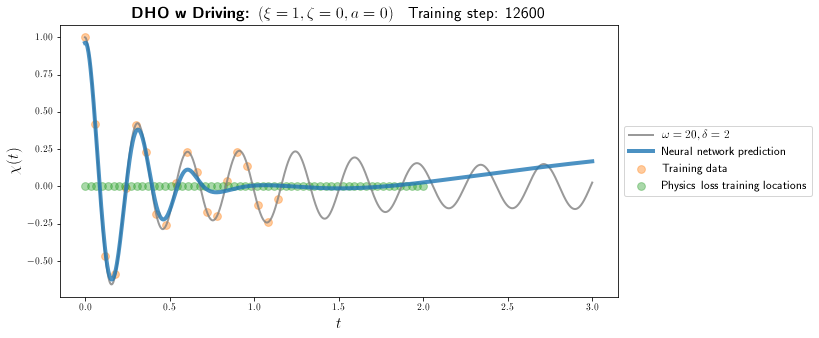

tensor(0.0125, grad_fn=<MeanBackward0>) tensor(0.0204, grad_fn=<MulBackward0>)


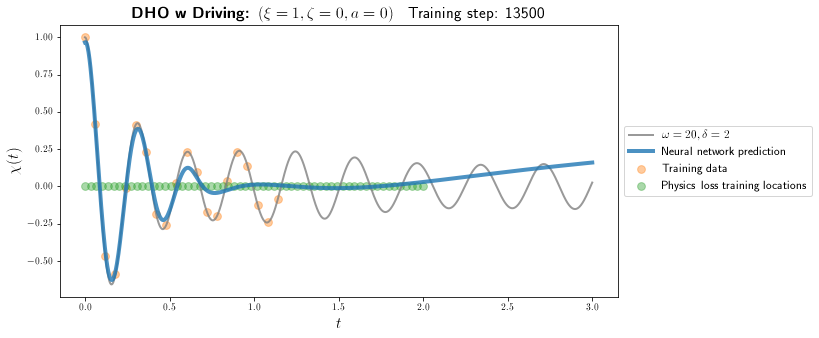

tensor(0.0119, grad_fn=<MeanBackward0>) tensor(0.0204, grad_fn=<MulBackward0>)


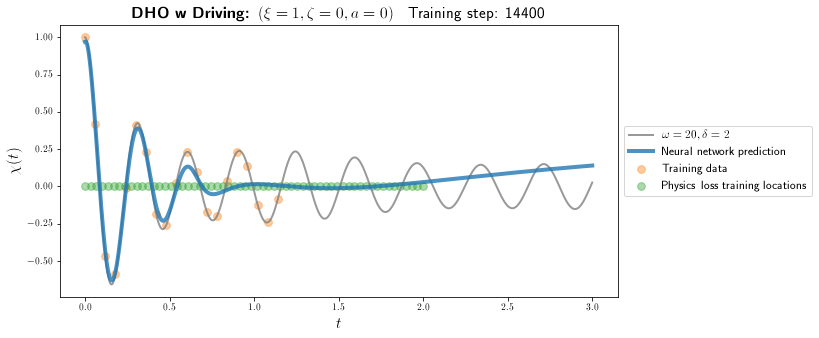

tensor(0.0114, grad_fn=<MeanBackward0>) tensor(0.0204, grad_fn=<MulBackward0>)


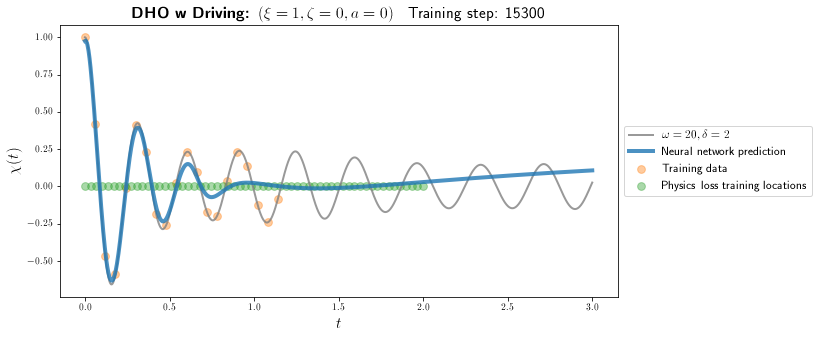

tensor(0.0100, grad_fn=<MeanBackward0>) tensor(0.0204, grad_fn=<MulBackward0>)


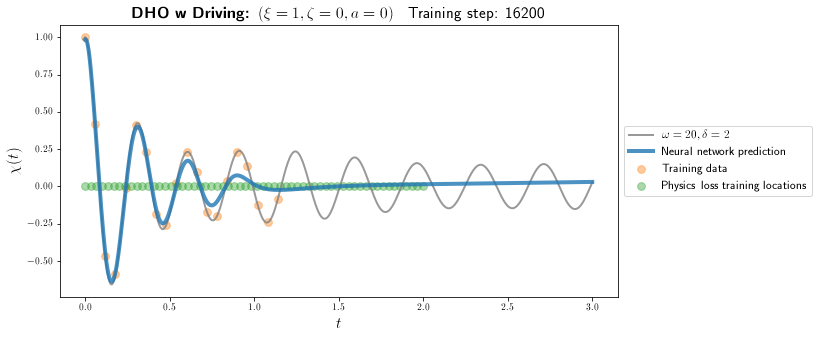

tensor(0.0063, grad_fn=<MeanBackward0>) tensor(0.0190, grad_fn=<MulBackward0>)


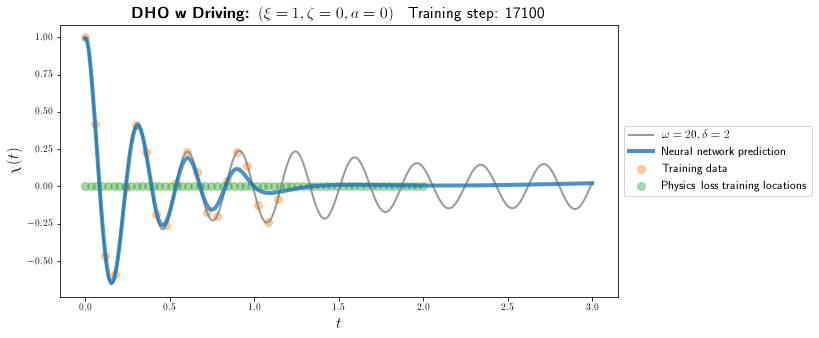

tensor(0.0042, grad_fn=<MeanBackward0>) tensor(0.0188, grad_fn=<MulBackward0>)


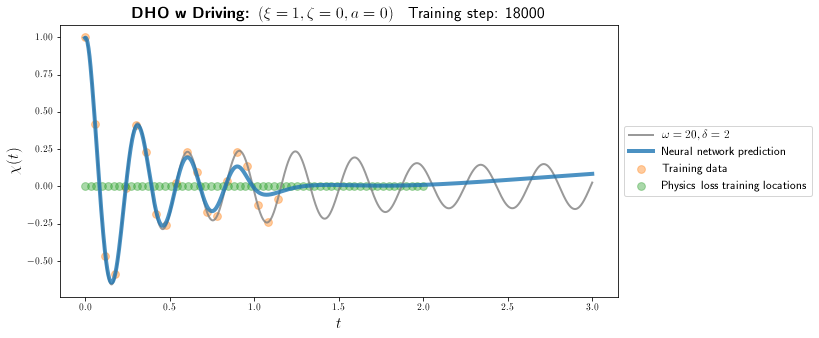

tensor(0.0035, grad_fn=<MeanBackward0>) tensor(0.0180, grad_fn=<MulBackward0>)


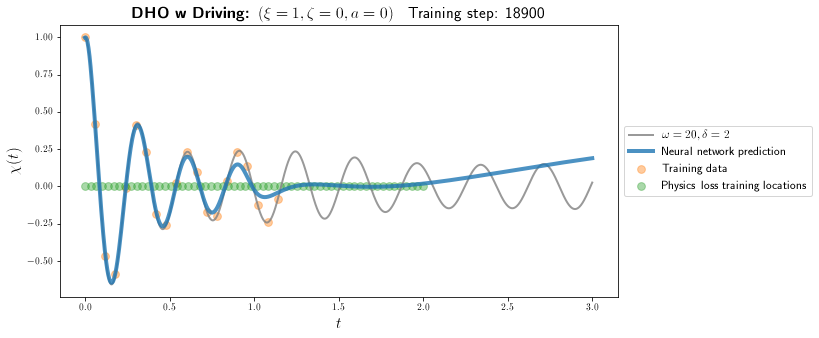

tensor(0.0028, grad_fn=<MeanBackward0>) tensor(0.0169, grad_fn=<MulBackward0>)


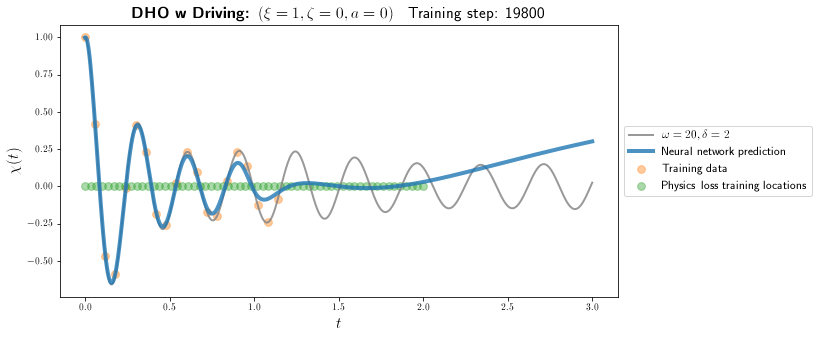

tensor(0.0023, grad_fn=<MeanBackward0>) tensor(0.0162, grad_fn=<MulBackward0>)


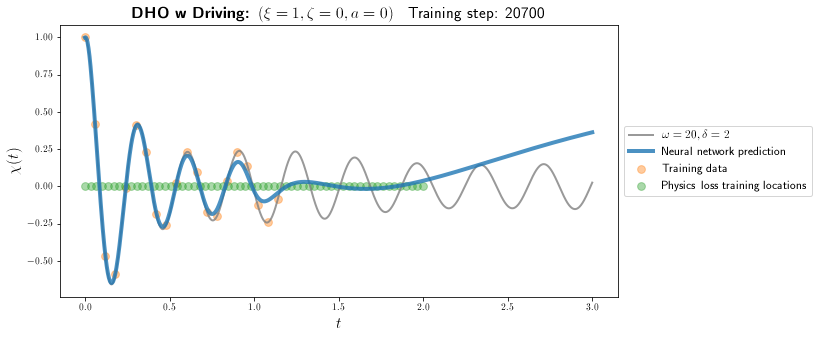

tensor(0.0020, grad_fn=<MeanBackward0>) tensor(0.0160, grad_fn=<MulBackward0>)


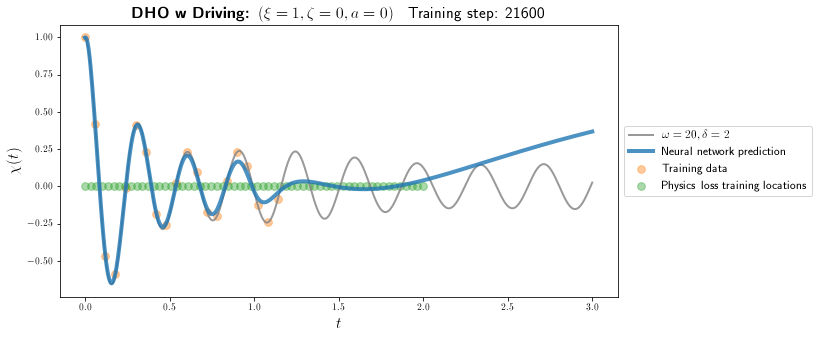

tensor(0.0018, grad_fn=<MeanBackward0>) tensor(0.0159, grad_fn=<MulBackward0>)


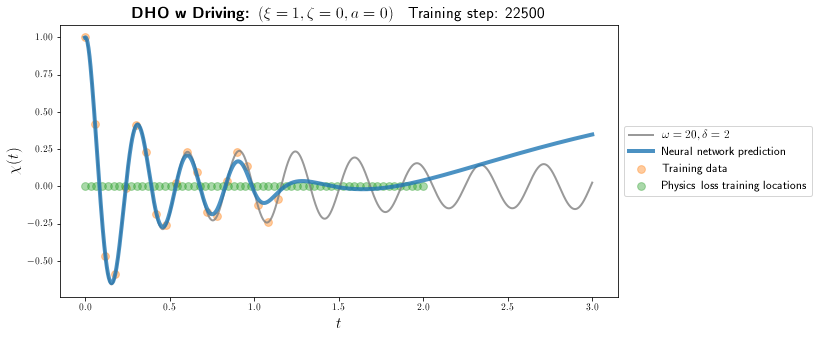

tensor(0.0017, grad_fn=<MeanBackward0>) tensor(0.0158, grad_fn=<MulBackward0>)


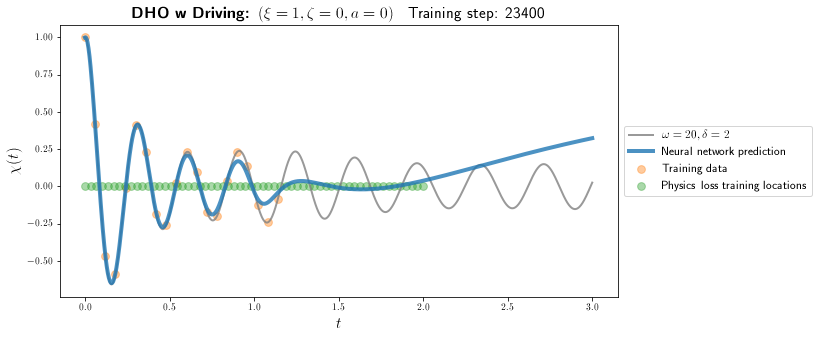

tensor(0.0017, grad_fn=<MeanBackward0>) tensor(0.0157, grad_fn=<MulBackward0>)


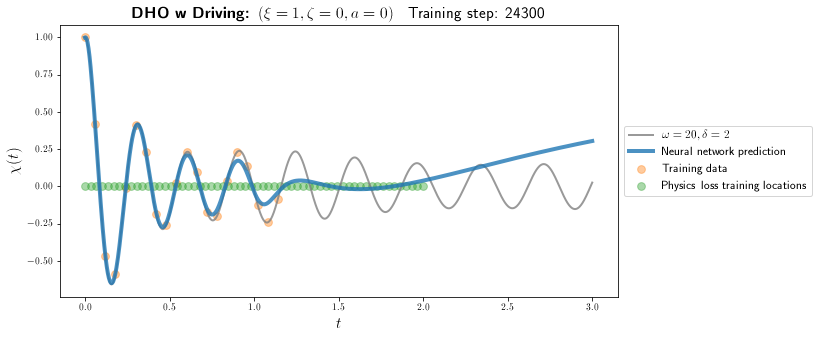

tensor(0.0015, grad_fn=<MeanBackward0>) tensor(0.0155, grad_fn=<MulBackward0>)


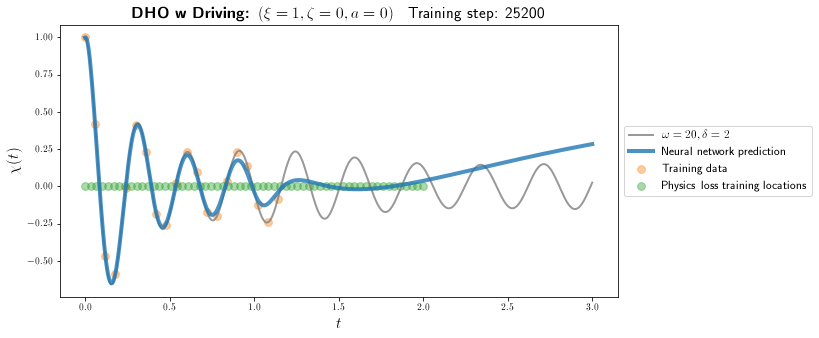

tensor(0.0014, grad_fn=<MeanBackward0>) tensor(0.0153, grad_fn=<MulBackward0>)


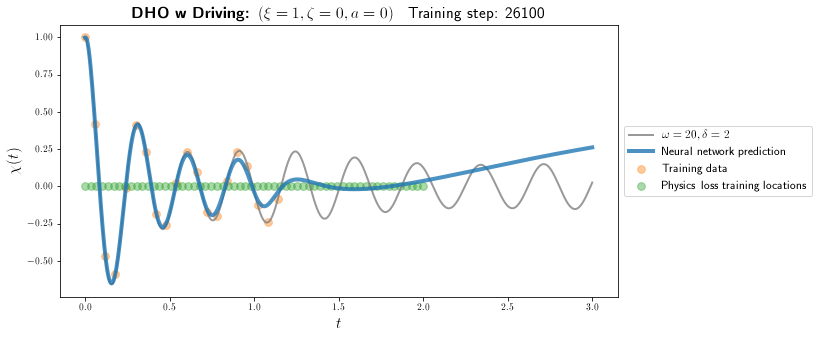

tensor(0.0013, grad_fn=<MeanBackward0>) tensor(0.0150, grad_fn=<MulBackward0>)


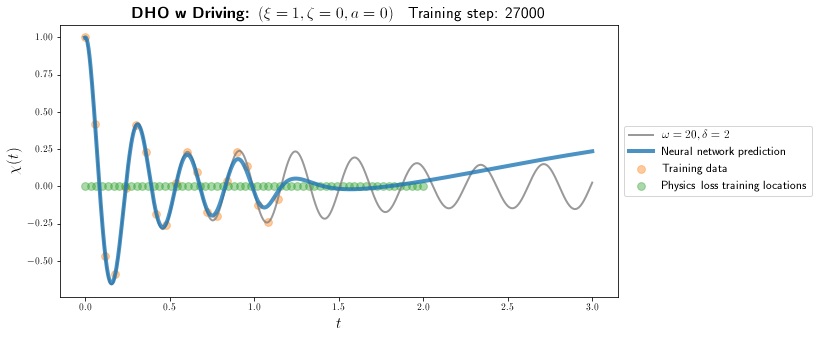

tensor(0.0012, grad_fn=<MeanBackward0>) tensor(0.0146, grad_fn=<MulBackward0>)


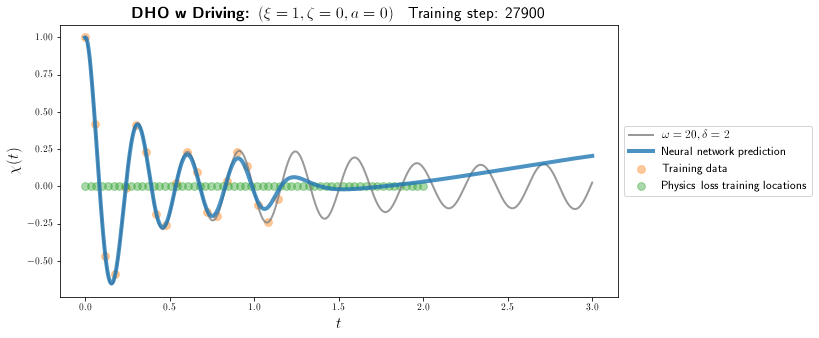

tensor(0.0010, grad_fn=<MeanBackward0>) tensor(0.0141, grad_fn=<MulBackward0>)


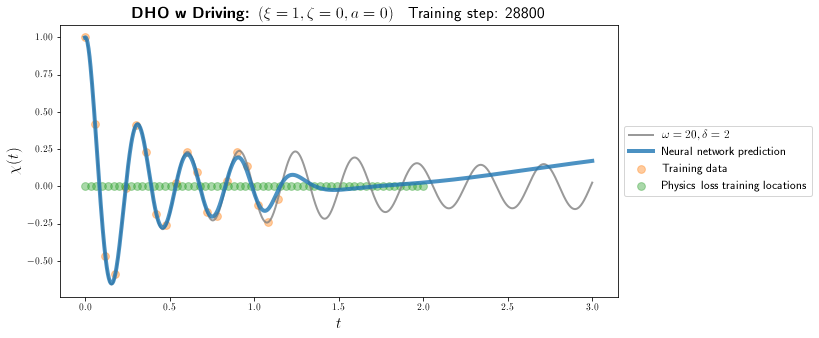

tensor(0.0008, grad_fn=<MeanBackward0>) tensor(0.0133, grad_fn=<MulBackward0>)


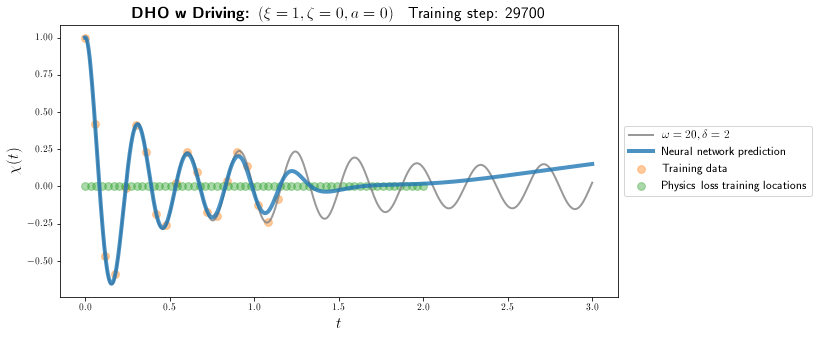

tensor(0.0006, grad_fn=<MeanBackward0>) tensor(0.0123, grad_fn=<MulBackward0>)


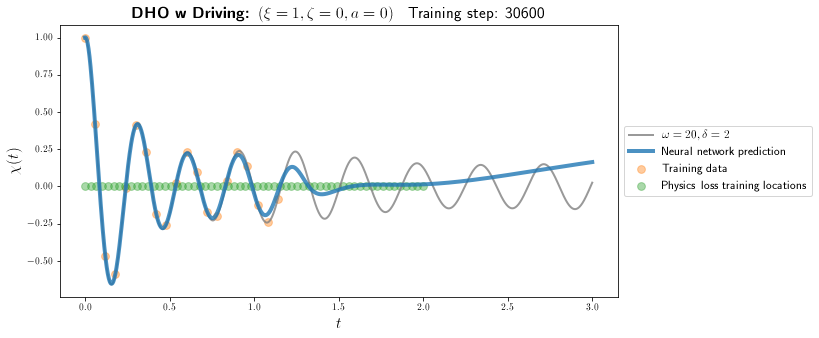

tensor(0.0004, grad_fn=<MeanBackward0>) tensor(0.0112, grad_fn=<MulBackward0>)


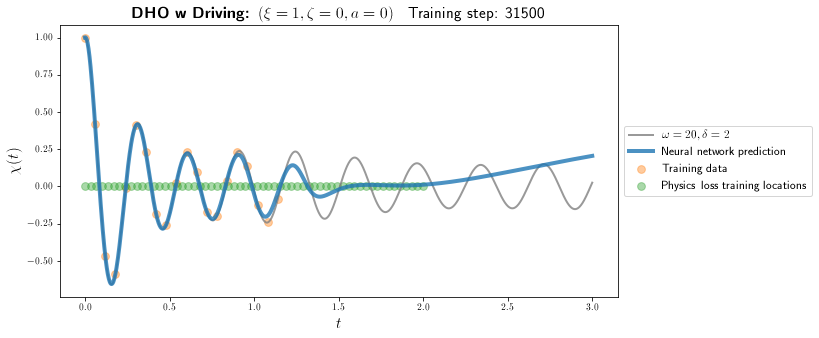

tensor(0.0004, grad_fn=<MeanBackward0>) tensor(0.0107, grad_fn=<MulBackward0>)


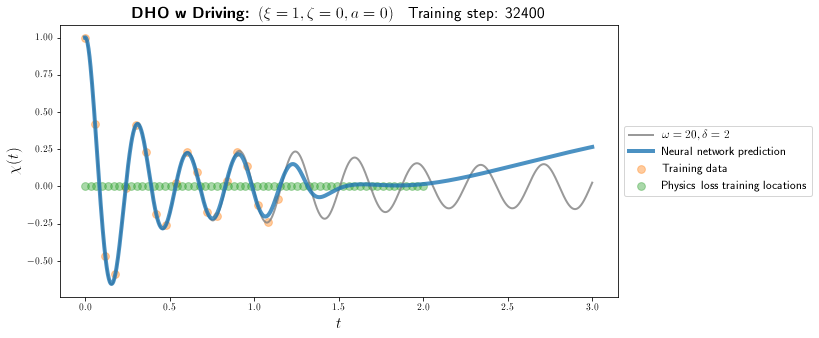

tensor(0.0003, grad_fn=<MeanBackward0>) tensor(0.0101, grad_fn=<MulBackward0>)


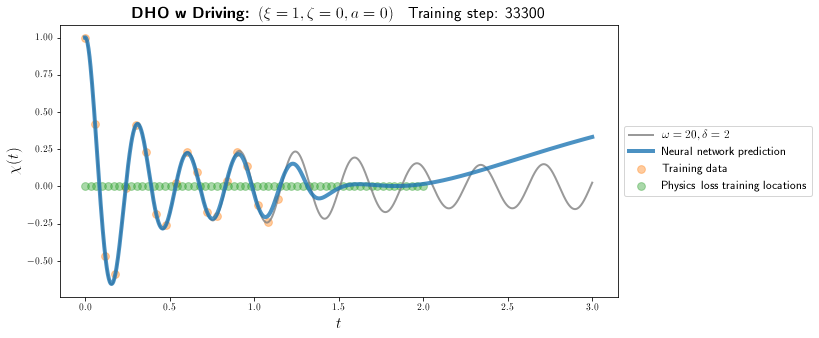

tensor(0.0003, grad_fn=<MeanBackward0>) tensor(0.0097, grad_fn=<MulBackward0>)


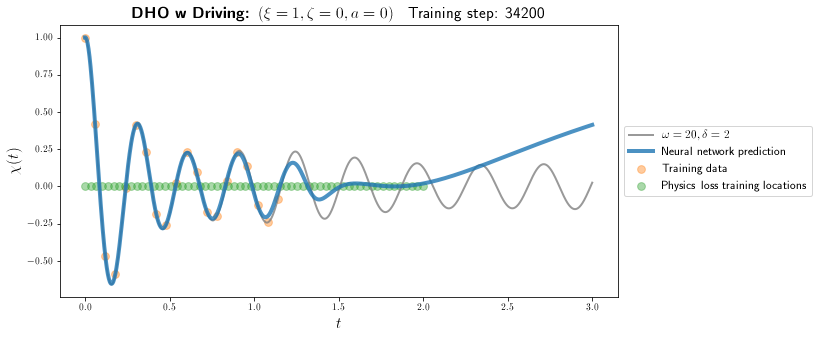

tensor(0.0003, grad_fn=<MeanBackward0>) tensor(0.0090, grad_fn=<MulBackward0>)


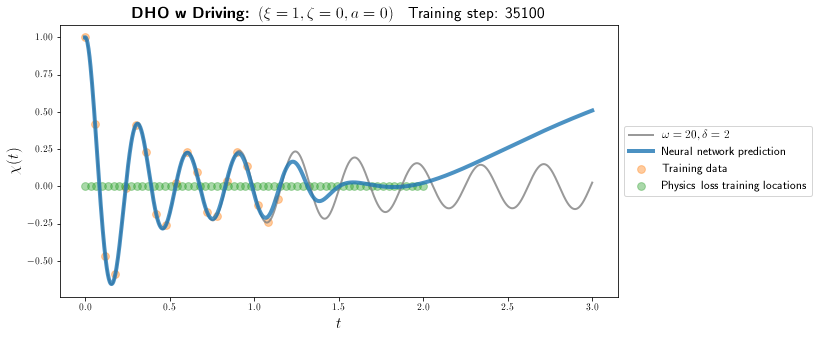

tensor(0.0002, grad_fn=<MeanBackward0>) tensor(0.0082, grad_fn=<MulBackward0>)


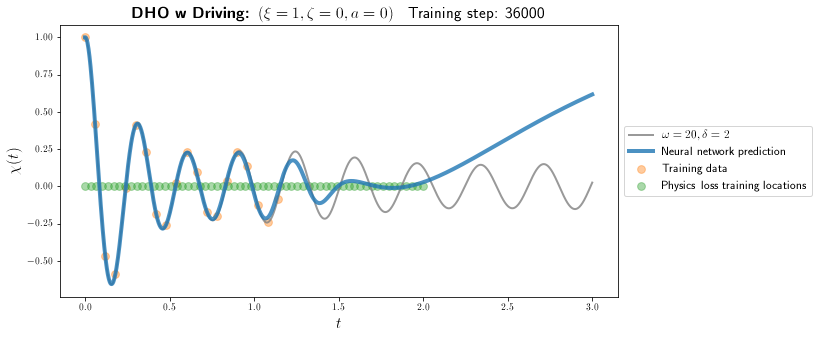

tensor(0.0002, grad_fn=<MeanBackward0>) tensor(0.0073, grad_fn=<MulBackward0>)


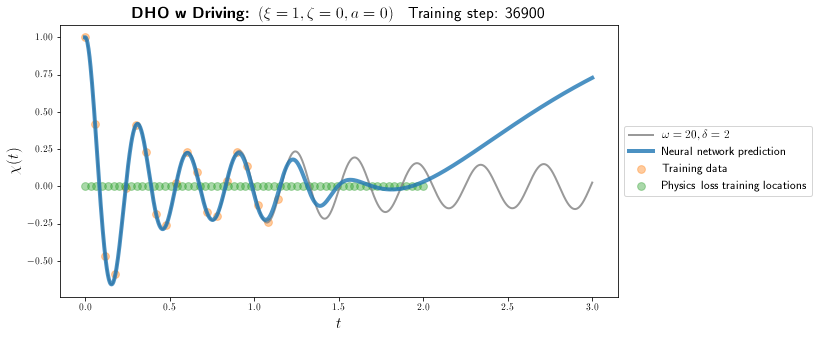

tensor(0.0002, grad_fn=<MeanBackward0>) tensor(0.0065, grad_fn=<MulBackward0>)


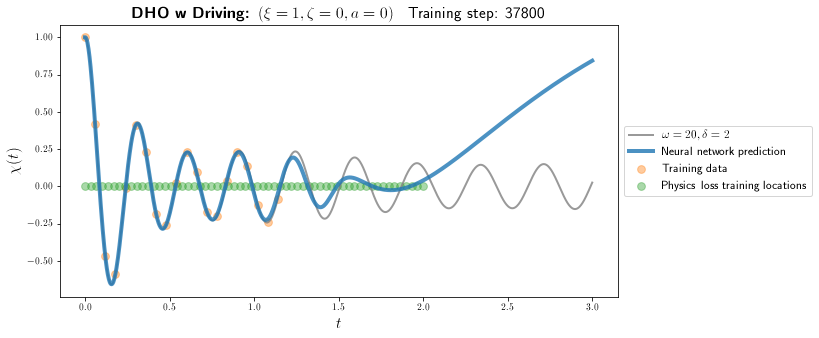

tensor(0.0001, grad_fn=<MeanBackward0>) tensor(0.0057, grad_fn=<MulBackward0>)


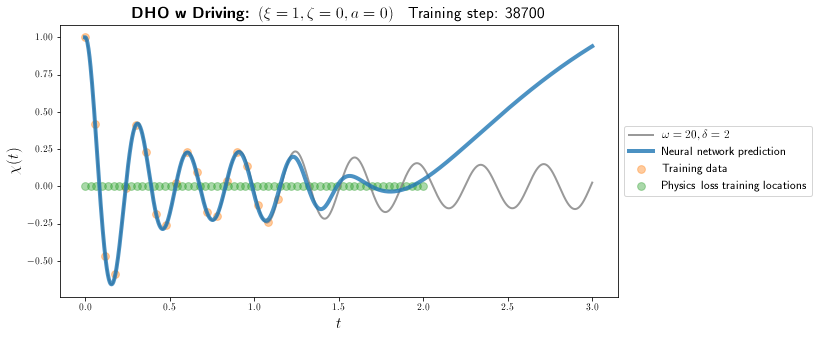

tensor(0.0001, grad_fn=<MeanBackward0>) tensor(0.0052, grad_fn=<MulBackward0>)


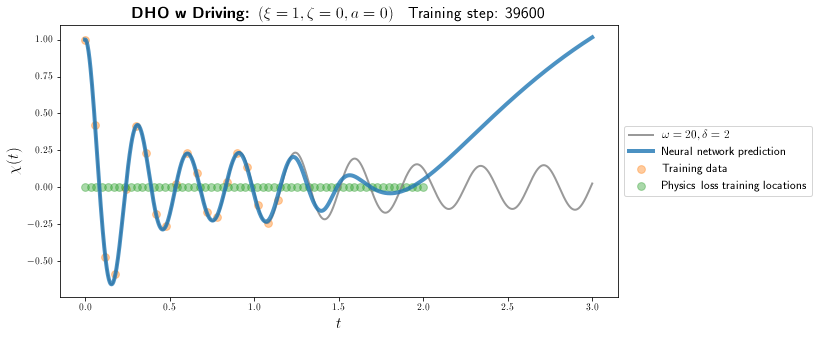

tensor(9.3806e-05, grad_fn=<MeanBackward0>) tensor(0.0048, grad_fn=<MulBackward0>)


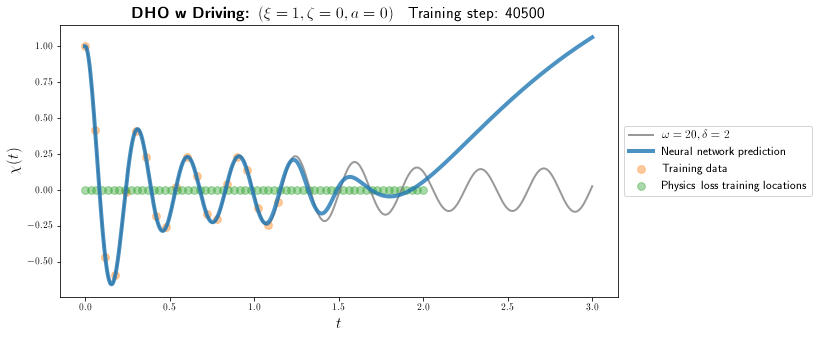

tensor(7.8708e-05, grad_fn=<MeanBackward0>) tensor(0.0046, grad_fn=<MulBackward0>)


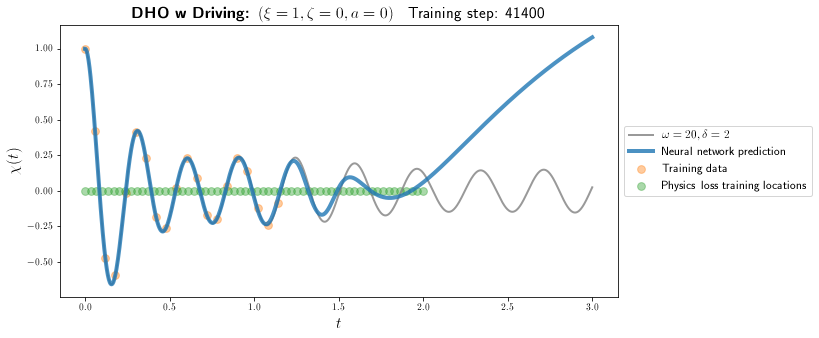

tensor(7.0378e-05, grad_fn=<MeanBackward0>) tensor(0.0045, grad_fn=<MulBackward0>)


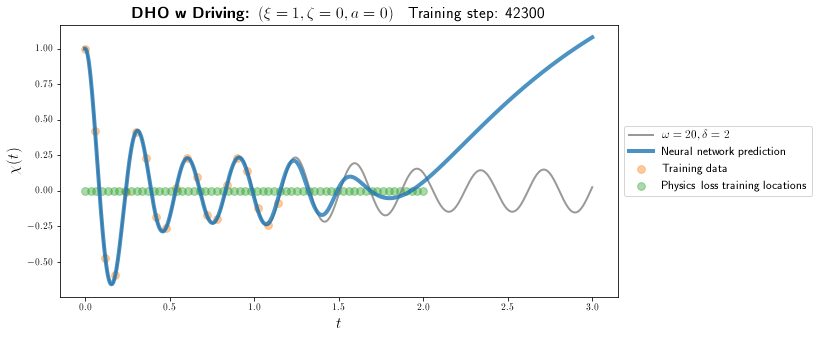

tensor(6.5467e-05, grad_fn=<MeanBackward0>) tensor(0.0044, grad_fn=<MulBackward0>)


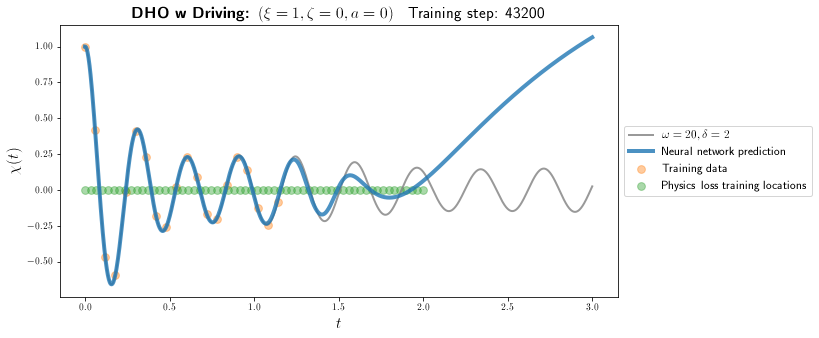

tensor(6.1838e-05, grad_fn=<MeanBackward0>) tensor(0.0044, grad_fn=<MulBackward0>)


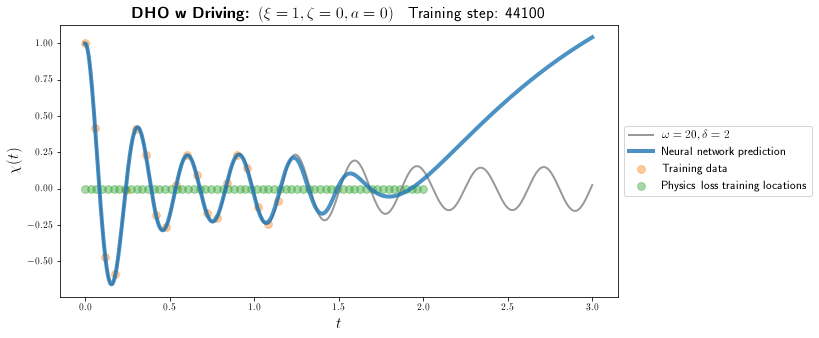

tensor(5.9228e-05, grad_fn=<MeanBackward0>) tensor(0.0043, grad_fn=<MulBackward0>)


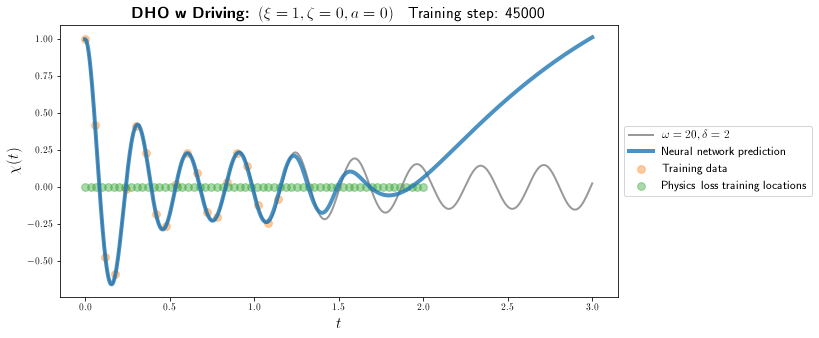

tensor(6.0364e-05, grad_fn=<MeanBackward0>) tensor(0.0043, grad_fn=<MulBackward0>)


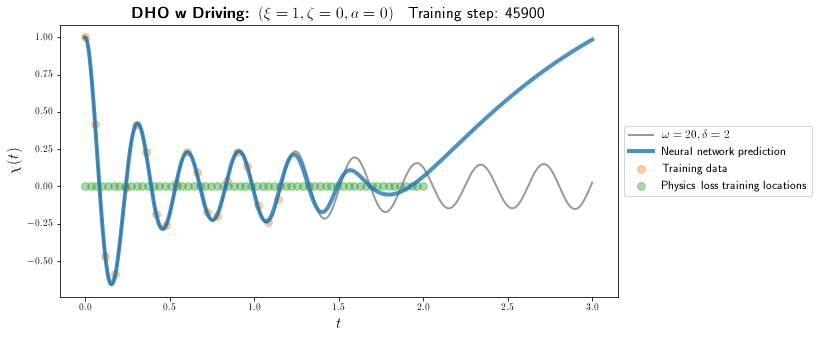

tensor(5.6816e-05, grad_fn=<MeanBackward0>) tensor(0.0042, grad_fn=<MulBackward0>)


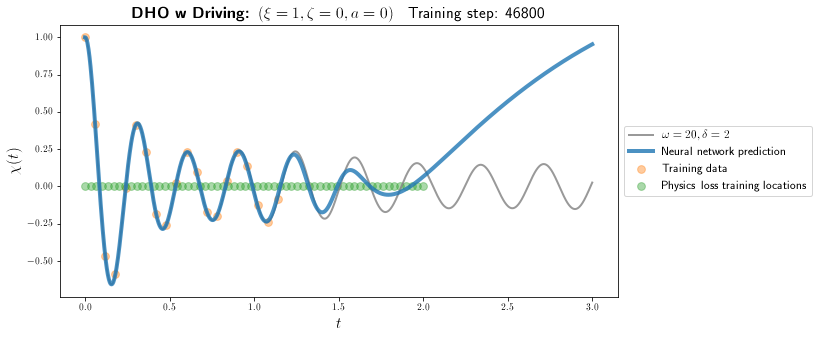

tensor(5.6195e-05, grad_fn=<MeanBackward0>) tensor(0.0042, grad_fn=<MulBackward0>)


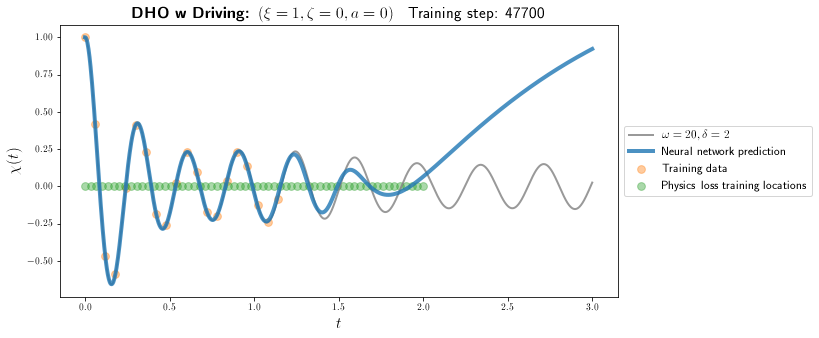

tensor(5.5155e-05, grad_fn=<MeanBackward0>) tensor(0.0041, grad_fn=<MulBackward0>)


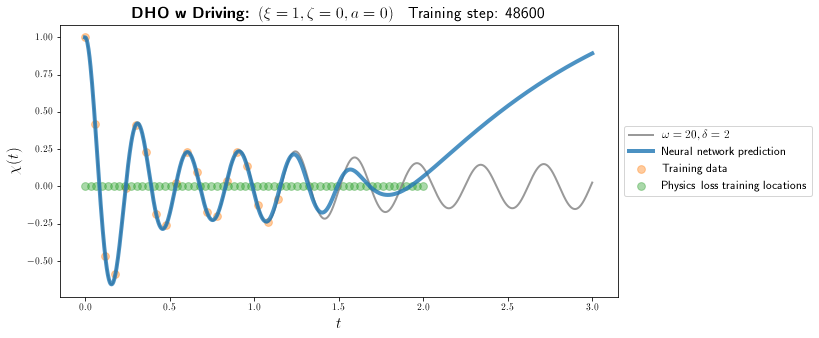

tensor(5.2808e-05, grad_fn=<MeanBackward0>) tensor(0.0040, grad_fn=<MulBackward0>)


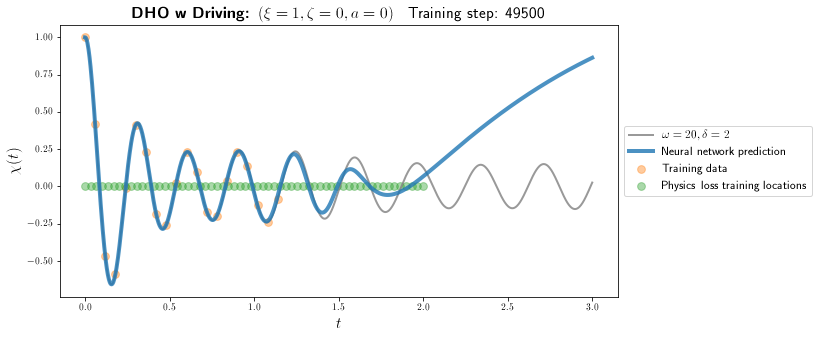

tensor(5.0327e-05, grad_fn=<MeanBackward0>) tensor(0.0040, grad_fn=<MulBackward0>)


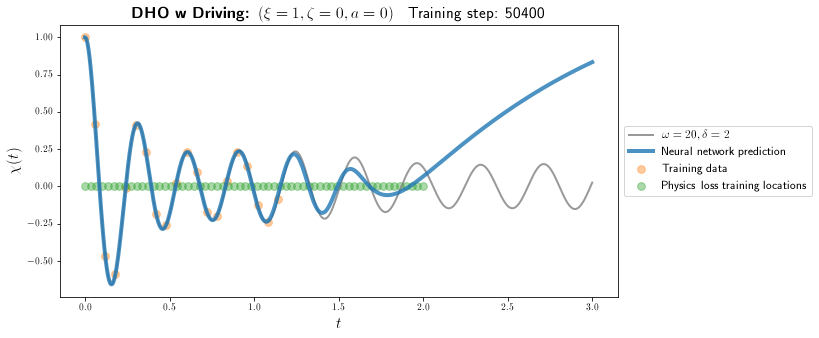

tensor(4.9665e-05, grad_fn=<MeanBackward0>) tensor(0.0039, grad_fn=<MulBackward0>)


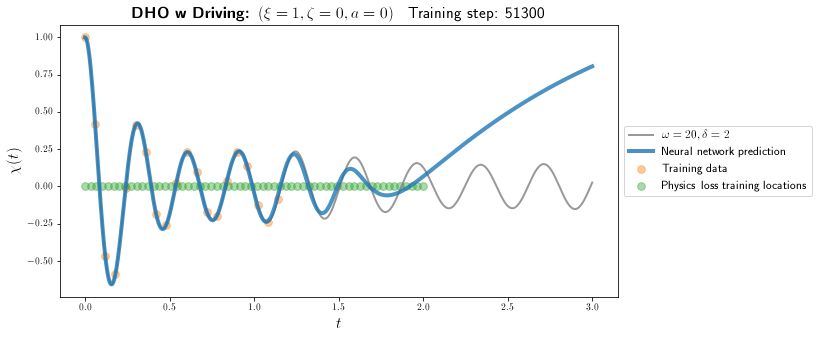

tensor(4.9801e-05, grad_fn=<MeanBackward0>) tensor(0.0038, grad_fn=<MulBackward0>)


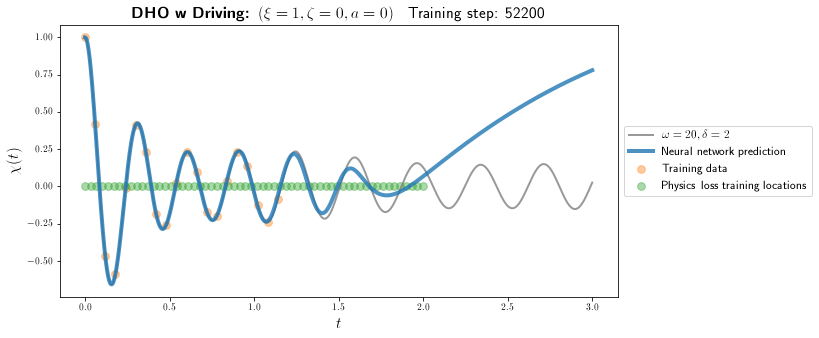

tensor(4.6441e-05, grad_fn=<MeanBackward0>) tensor(0.0038, grad_fn=<MulBackward0>)


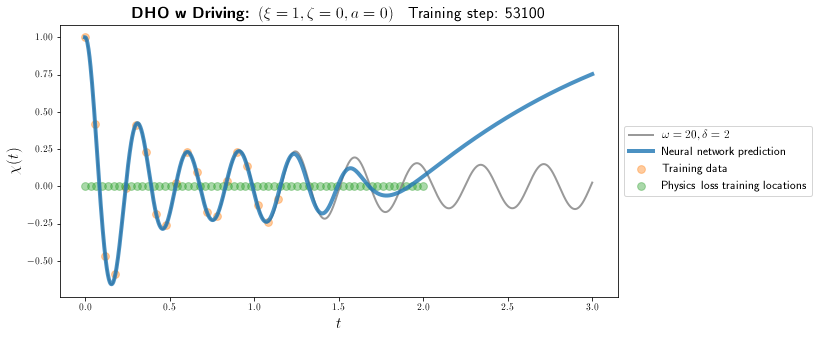

tensor(4.5022e-05, grad_fn=<MeanBackward0>) tensor(0.0037, grad_fn=<MulBackward0>)


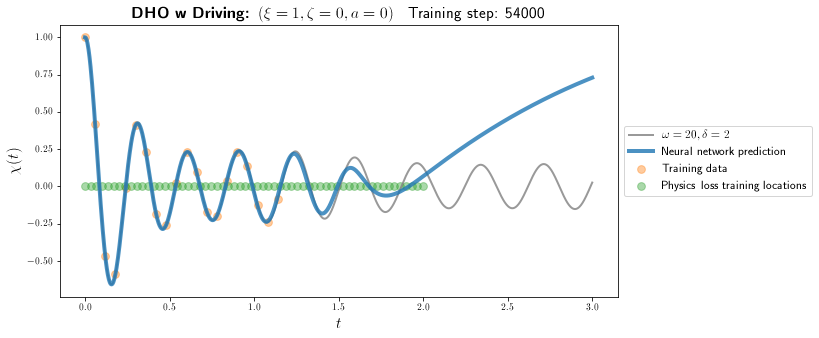

tensor(4.3368e-05, grad_fn=<MeanBackward0>) tensor(0.0036, grad_fn=<MulBackward0>)


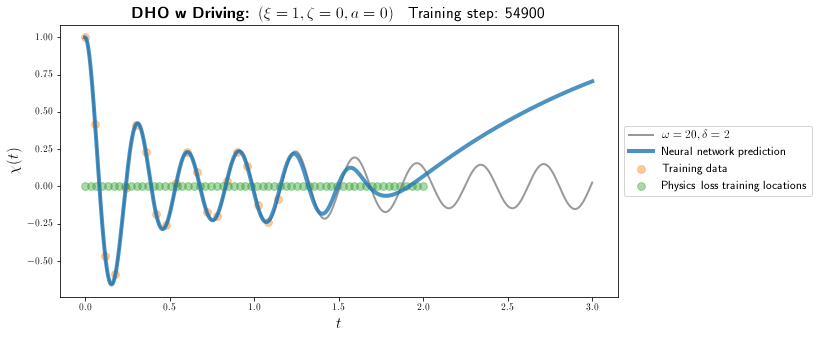

tensor(4.3250e-05, grad_fn=<MeanBackward0>) tensor(0.0036, grad_fn=<MulBackward0>)


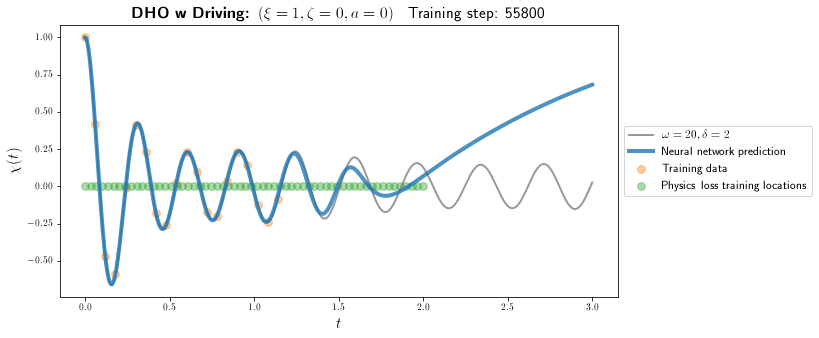

tensor(4.0573e-05, grad_fn=<MeanBackward0>) tensor(0.0035, grad_fn=<MulBackward0>)


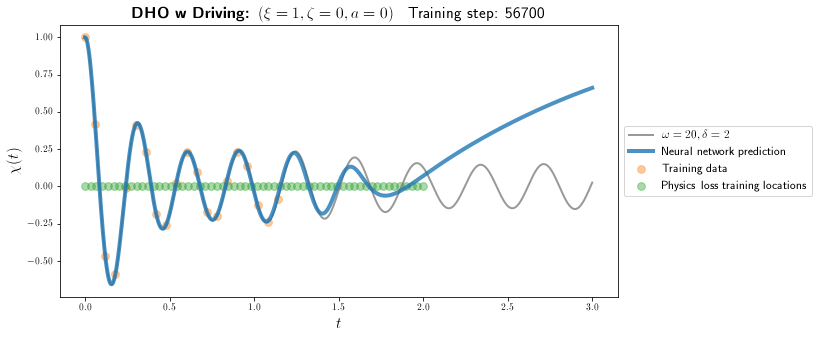

tensor(4.0196e-05, grad_fn=<MeanBackward0>) tensor(0.0036, grad_fn=<MulBackward0>)


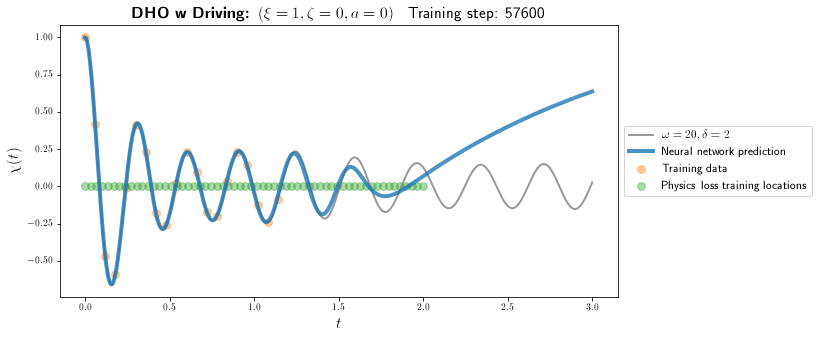

tensor(4.3522e-05, grad_fn=<MeanBackward0>) tensor(0.0035, grad_fn=<MulBackward0>)


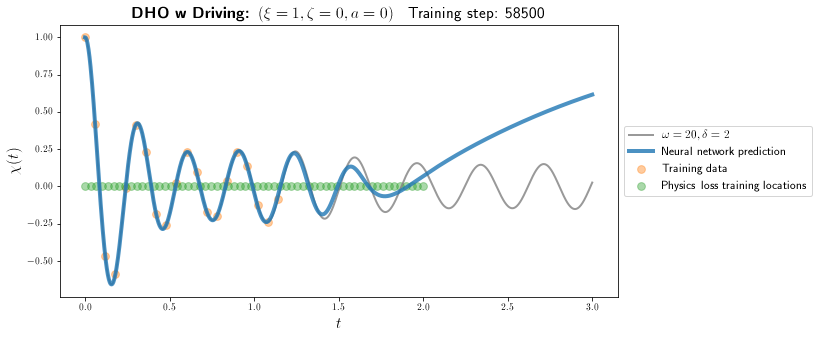

tensor(3.5880e-05, grad_fn=<MeanBackward0>) tensor(0.0034, grad_fn=<MulBackward0>)


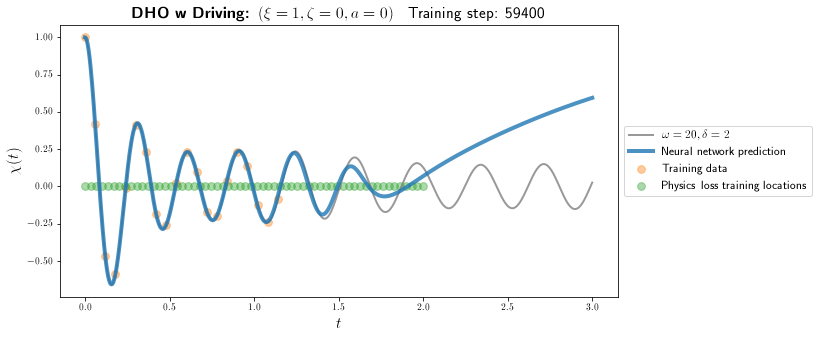

tensor(3.4247e-05, grad_fn=<MeanBackward0>) tensor(0.0033, grad_fn=<MulBackward0>)


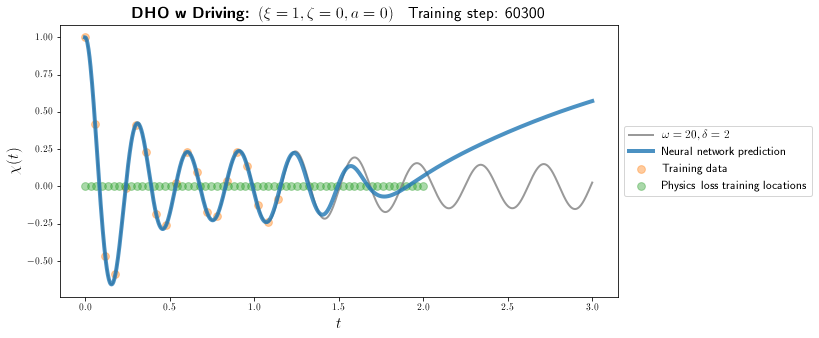

tensor(3.3210e-05, grad_fn=<MeanBackward0>) tensor(0.0032, grad_fn=<MulBackward0>)


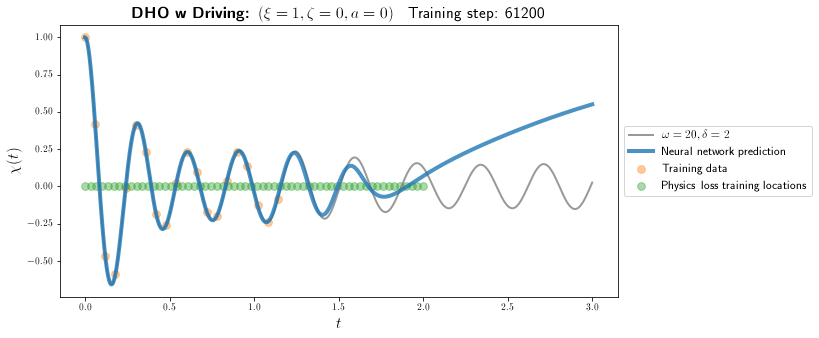

tensor(3.1475e-05, grad_fn=<MeanBackward0>) tensor(0.0032, grad_fn=<MulBackward0>)


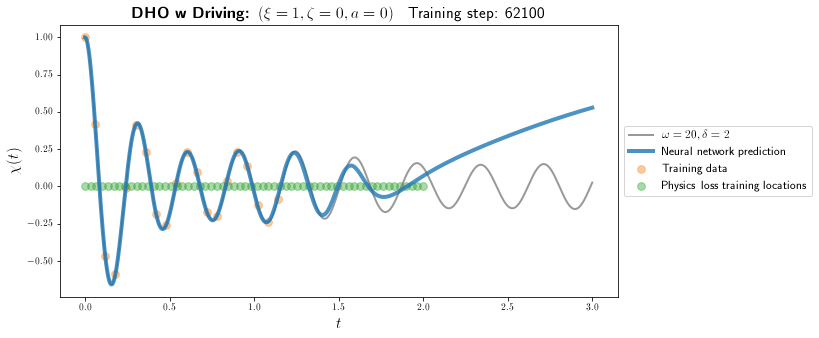

tensor(3.0356e-05, grad_fn=<MeanBackward0>) tensor(0.0031, grad_fn=<MulBackward0>)


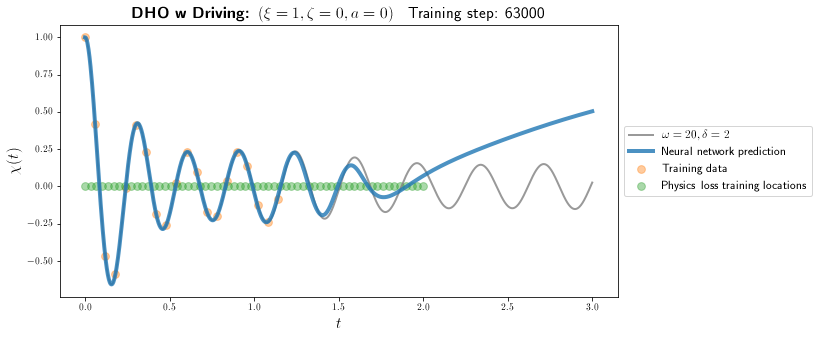

tensor(2.8908e-05, grad_fn=<MeanBackward0>) tensor(0.0030, grad_fn=<MulBackward0>)


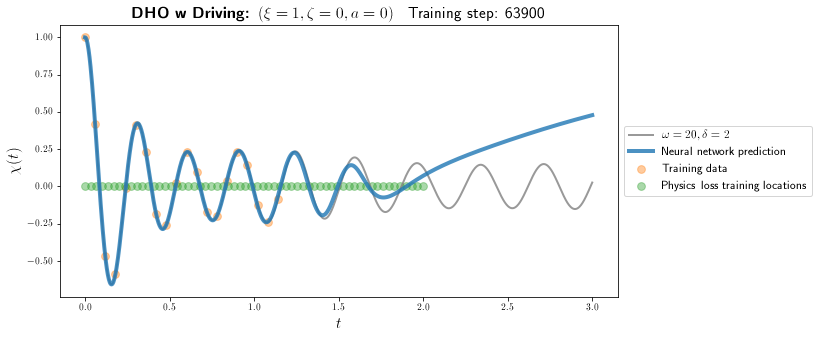

tensor(2.8011e-05, grad_fn=<MeanBackward0>) tensor(0.0030, grad_fn=<MulBackward0>)


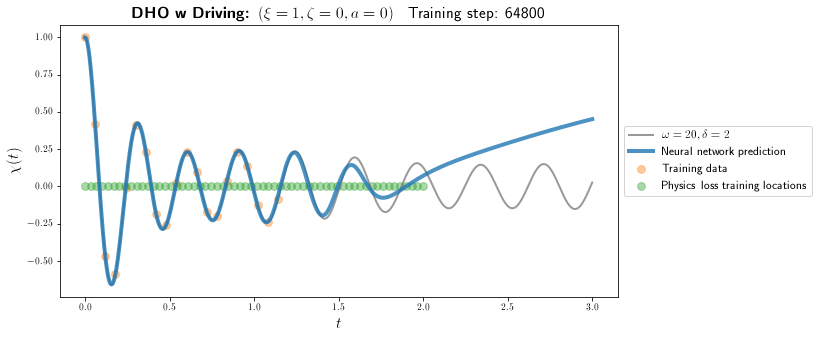

tensor(2.7005e-05, grad_fn=<MeanBackward0>) tensor(0.0029, grad_fn=<MulBackward0>)


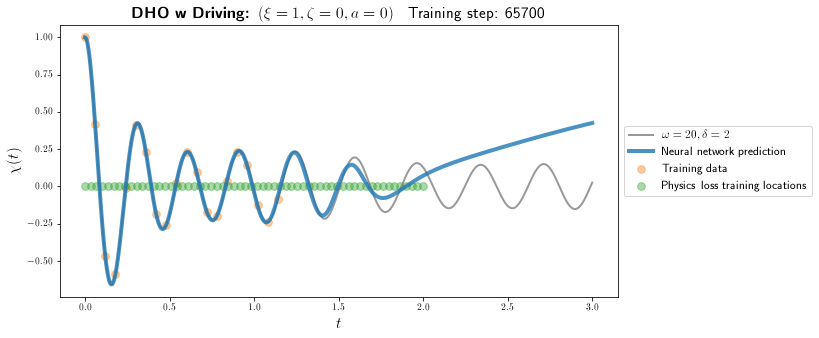

tensor(2.6055e-05, grad_fn=<MeanBackward0>) tensor(0.0028, grad_fn=<MulBackward0>)


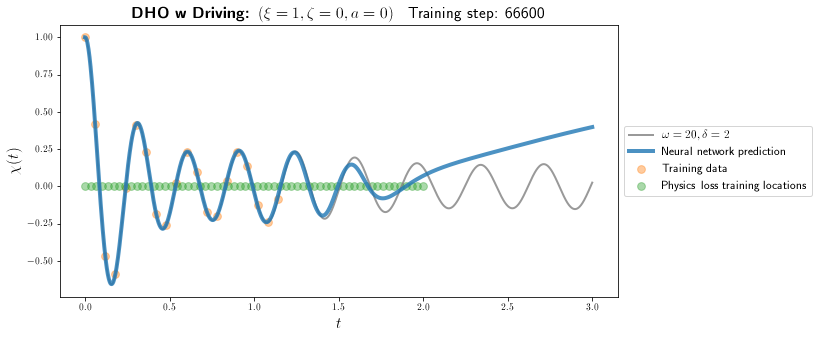

tensor(2.7044e-05, grad_fn=<MeanBackward0>) tensor(0.0028, grad_fn=<MulBackward0>)


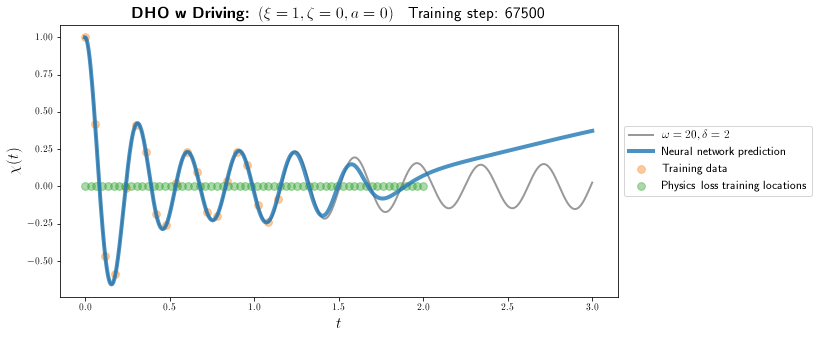

tensor(2.3972e-05, grad_fn=<MeanBackward0>) tensor(0.0027, grad_fn=<MulBackward0>)


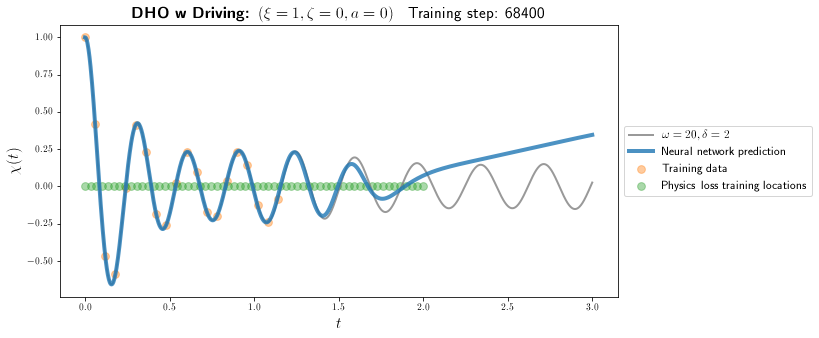

tensor(2.2525e-05, grad_fn=<MeanBackward0>) tensor(0.0026, grad_fn=<MulBackward0>)


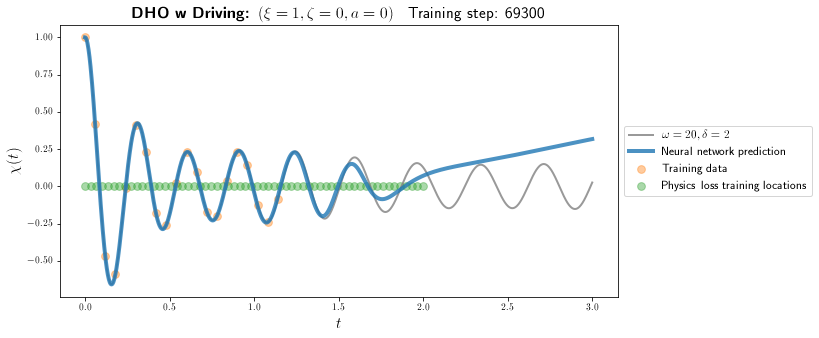

tensor(2.3248e-05, grad_fn=<MeanBackward0>) tensor(0.0025, grad_fn=<MulBackward0>)


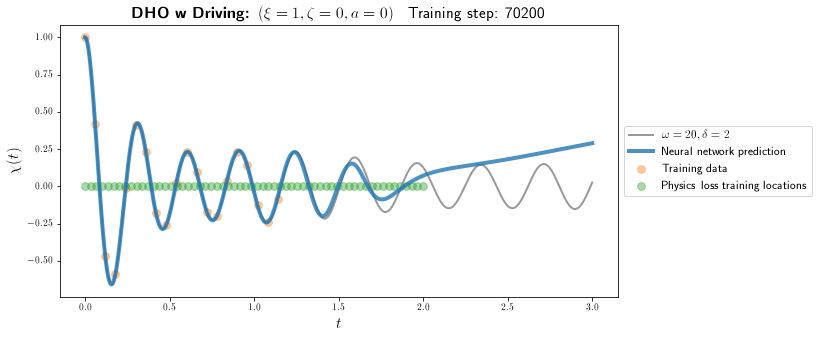

tensor(2.0876e-05, grad_fn=<MeanBackward0>) tensor(0.0024, grad_fn=<MulBackward0>)


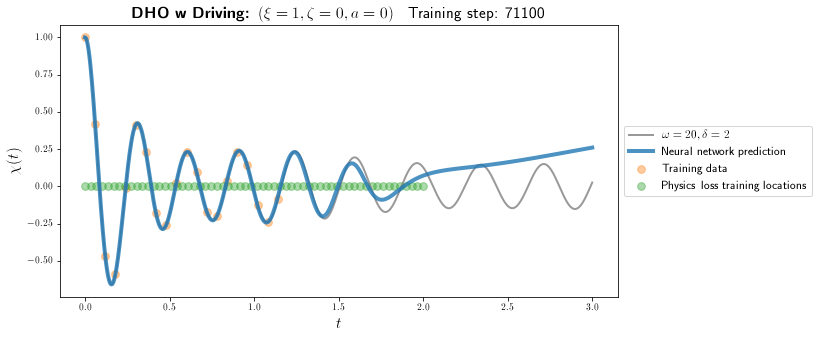

tensor(2.0314e-05, grad_fn=<MeanBackward0>) tensor(0.0024, grad_fn=<MulBackward0>)


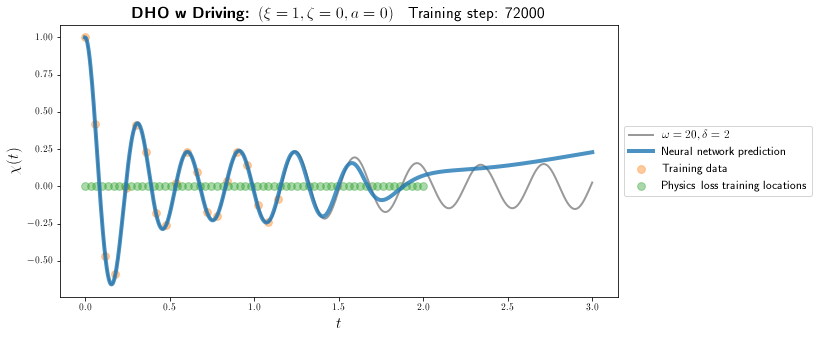

tensor(1.8810e-05, grad_fn=<MeanBackward0>) tensor(0.0023, grad_fn=<MulBackward0>)


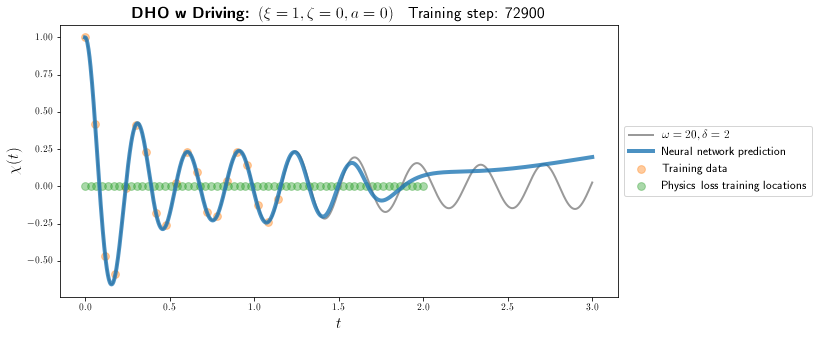

tensor(1.9810e-05, grad_fn=<MeanBackward0>) tensor(0.0022, grad_fn=<MulBackward0>)


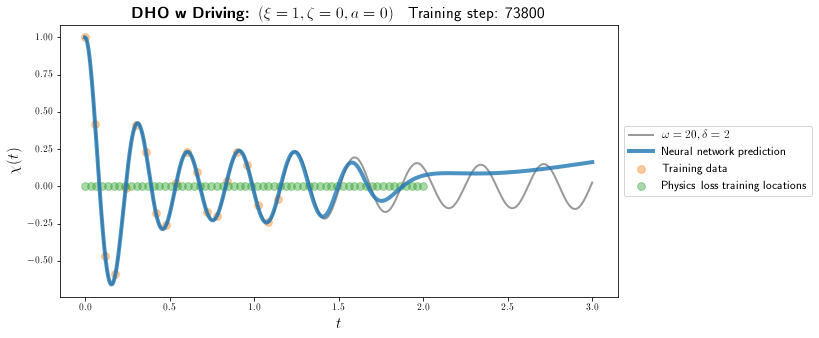

tensor(1.6682e-05, grad_fn=<MeanBackward0>) tensor(0.0021, grad_fn=<MulBackward0>)


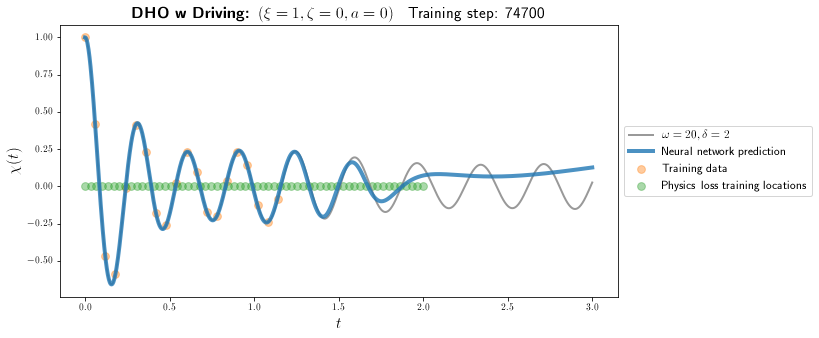

tensor(1.5409e-05, grad_fn=<MeanBackward0>) tensor(0.0020, grad_fn=<MulBackward0>)


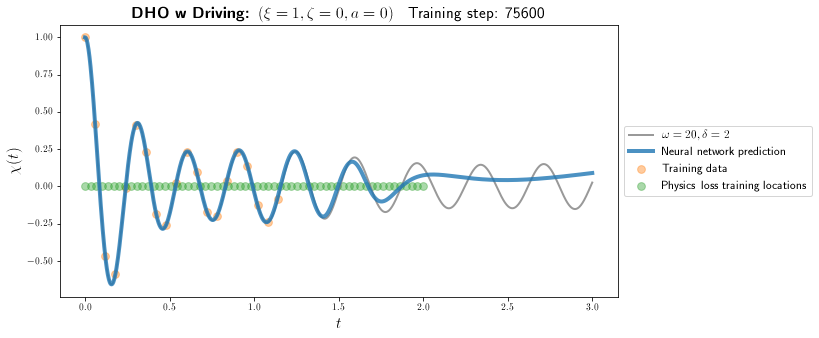

tensor(1.7213e-05, grad_fn=<MeanBackward0>) tensor(0.0020, grad_fn=<MulBackward0>)


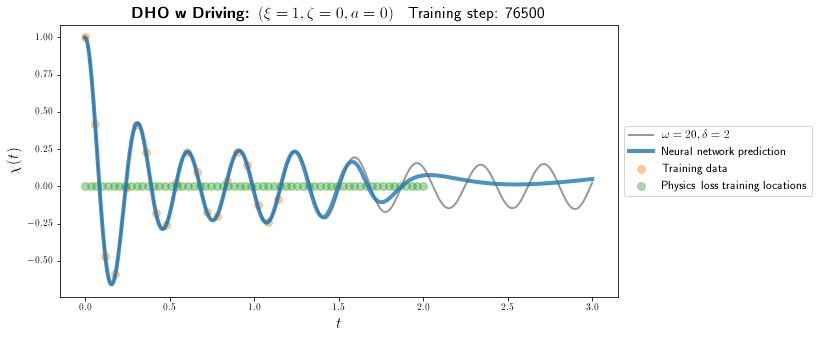

tensor(1.3230e-05, grad_fn=<MeanBackward0>) tensor(0.0018, grad_fn=<MulBackward0>)


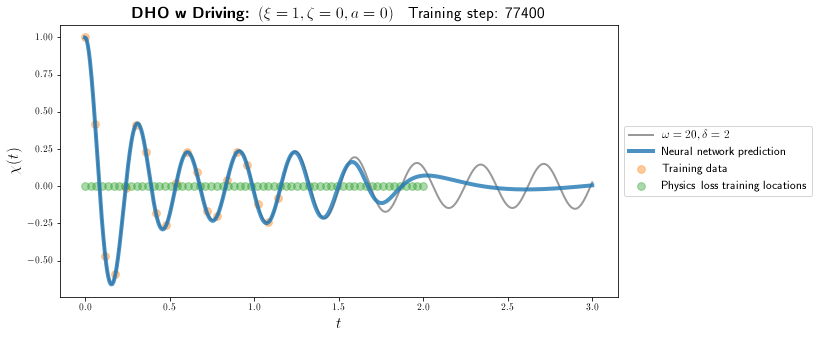

tensor(2.8534e-05, grad_fn=<MeanBackward0>) tensor(0.0020, grad_fn=<MulBackward0>)


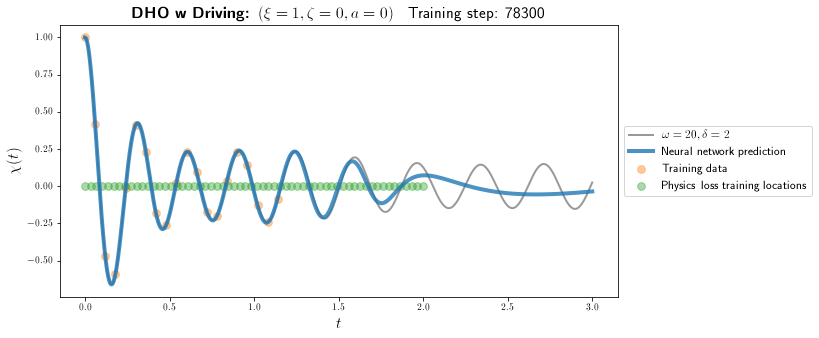

tensor(1.2228e-05, grad_fn=<MeanBackward0>) tensor(0.0017, grad_fn=<MulBackward0>)


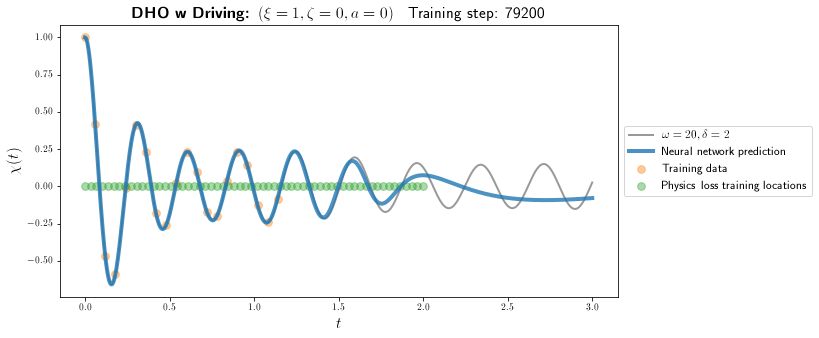

tensor(1.0202e-05, grad_fn=<MeanBackward0>) tensor(0.0016, grad_fn=<MulBackward0>)


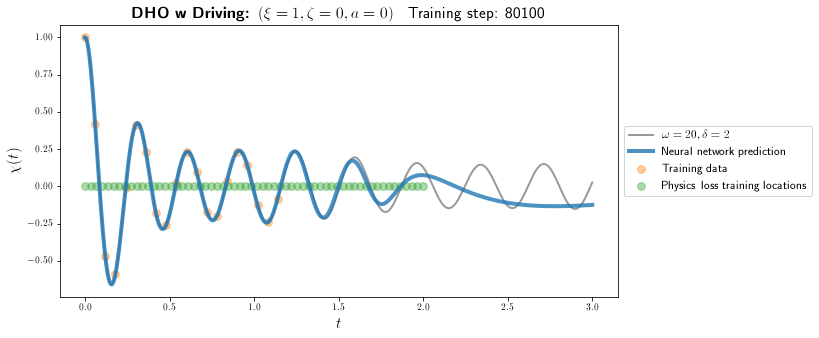

tensor(9.2903e-06, grad_fn=<MeanBackward0>) tensor(0.0015, grad_fn=<MulBackward0>)


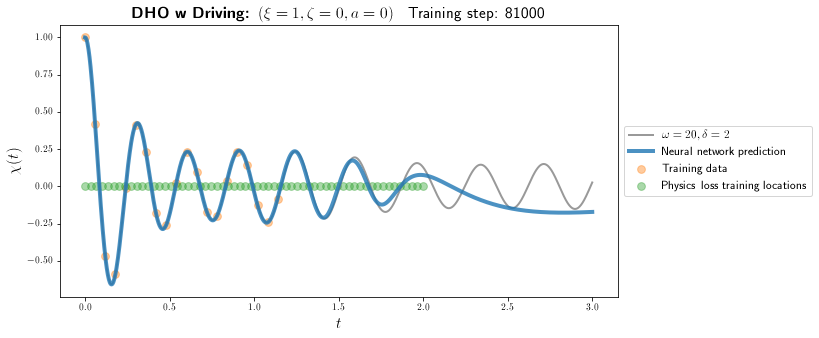

tensor(8.4169e-06, grad_fn=<MeanBackward0>) tensor(0.0014, grad_fn=<MulBackward0>)


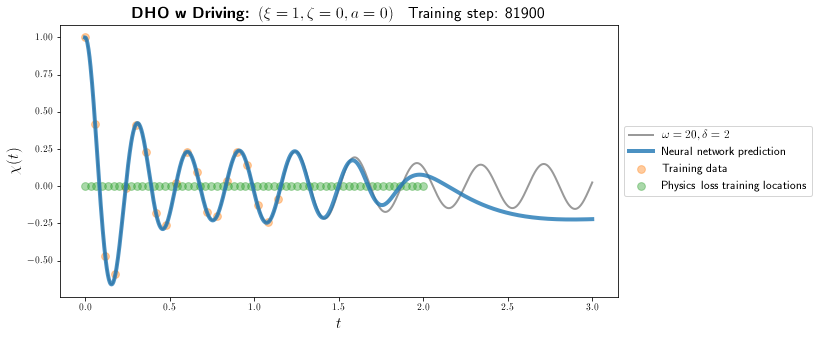

tensor(7.7991e-06, grad_fn=<MeanBackward0>) tensor(0.0013, grad_fn=<MulBackward0>)


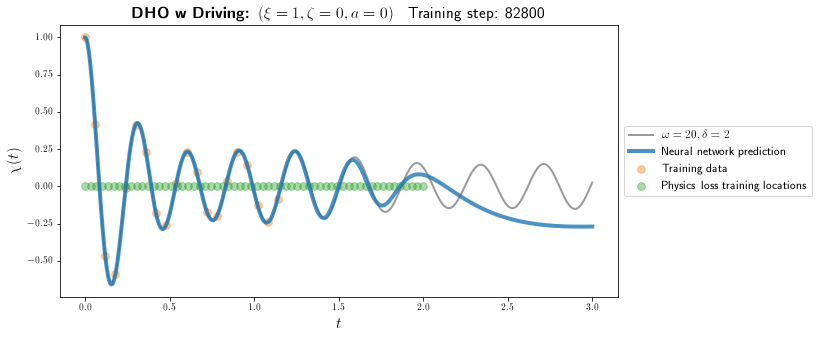

tensor(6.8764e-06, grad_fn=<MeanBackward0>) tensor(0.0012, grad_fn=<MulBackward0>)


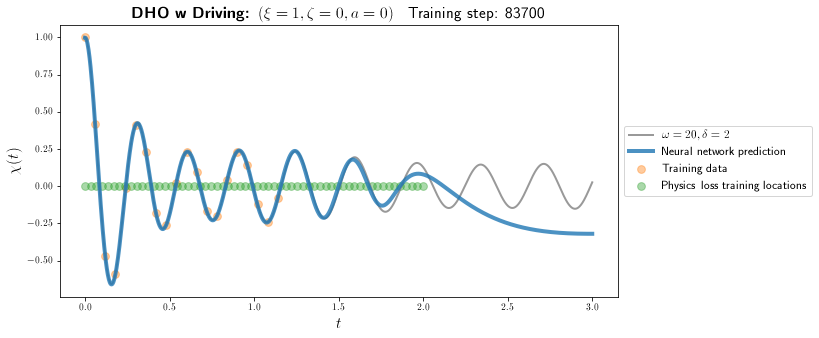

tensor(6.4888e-06, grad_fn=<MeanBackward0>) tensor(0.0011, grad_fn=<MulBackward0>)


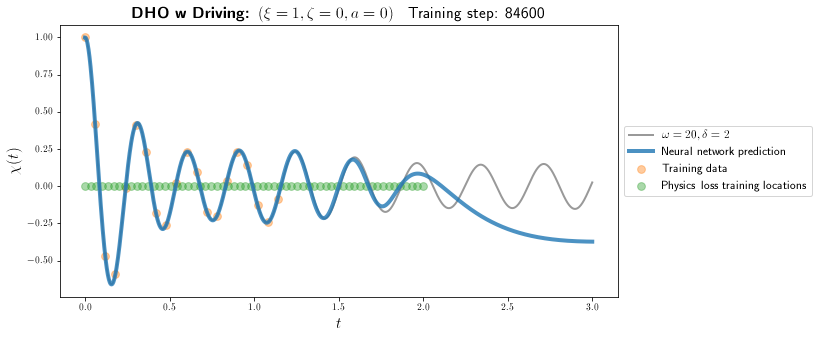

tensor(5.6229e-06, grad_fn=<MeanBackward0>) tensor(0.0011, grad_fn=<MulBackward0>)


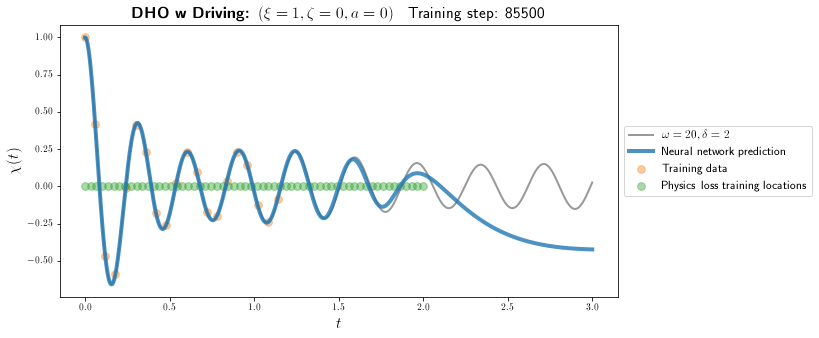

tensor(6.6233e-06, grad_fn=<MeanBackward0>) tensor(0.0010, grad_fn=<MulBackward0>)


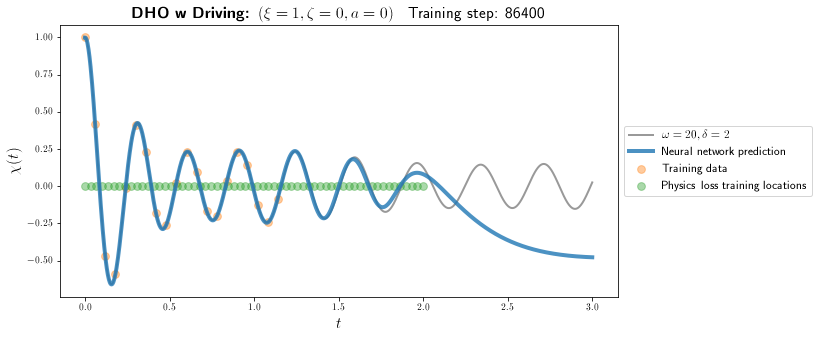

tensor(4.7704e-06, grad_fn=<MeanBackward0>) tensor(0.0009, grad_fn=<MulBackward0>)


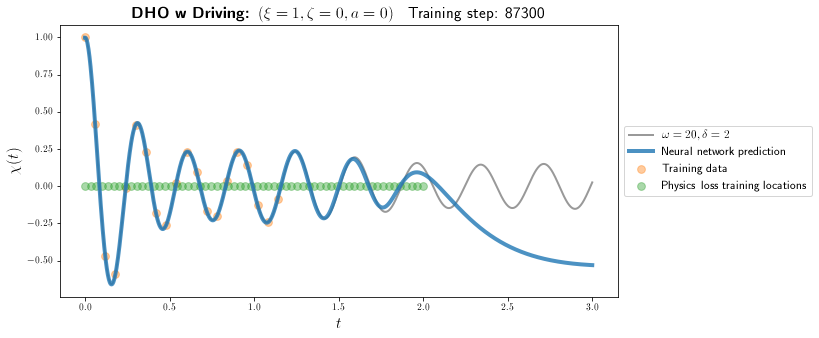

tensor(4.3519e-06, grad_fn=<MeanBackward0>) tensor(0.0008, grad_fn=<MulBackward0>)


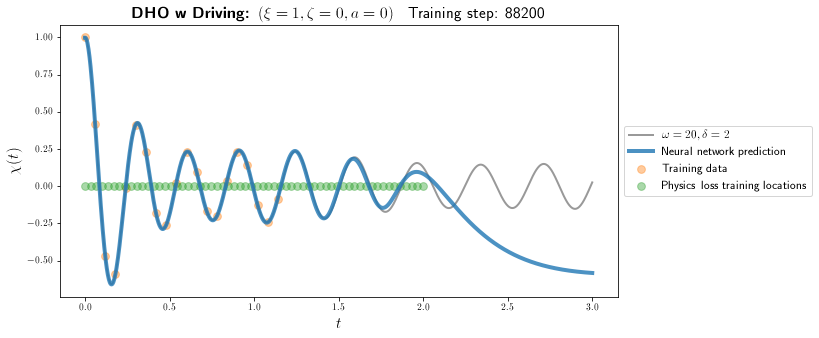

tensor(3.8905e-06, grad_fn=<MeanBackward0>) tensor(0.0008, grad_fn=<MulBackward0>)


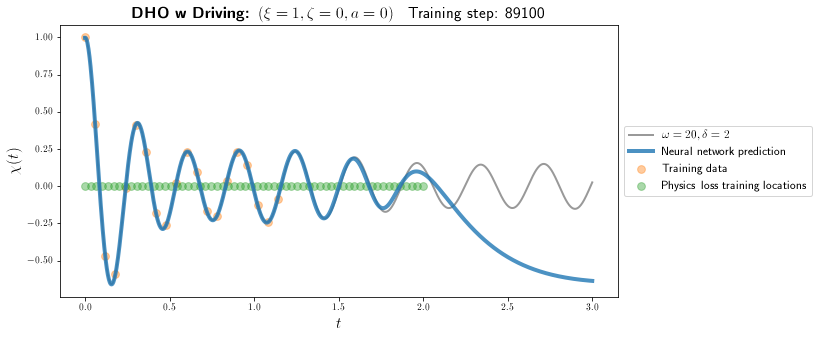

tensor(3.6200e-06, grad_fn=<MeanBackward0>) tensor(0.0007, grad_fn=<MulBackward0>)


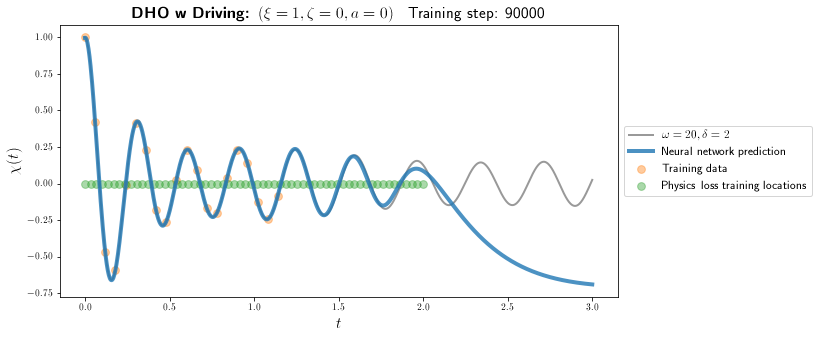

tensor(3.6802e-06, grad_fn=<MeanBackward0>) tensor(0.0006, grad_fn=<MulBackward0>)


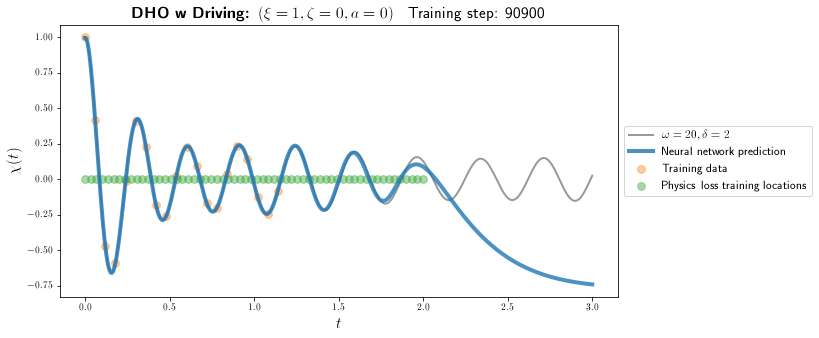

tensor(3.2865e-06, grad_fn=<MeanBackward0>) tensor(0.0006, grad_fn=<MulBackward0>)


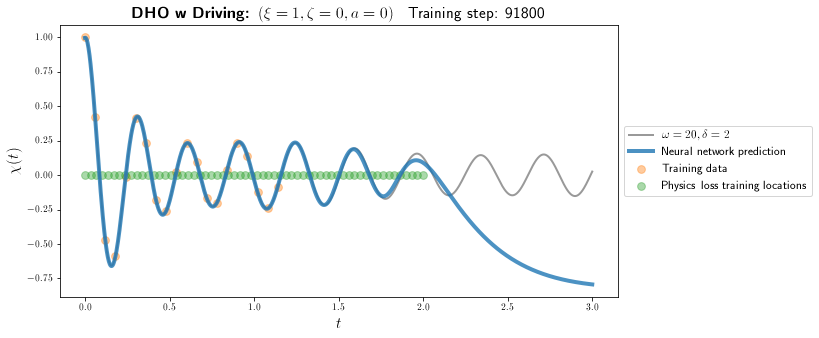

tensor(3.1721e-06, grad_fn=<MeanBackward0>) tensor(0.0005, grad_fn=<MulBackward0>)


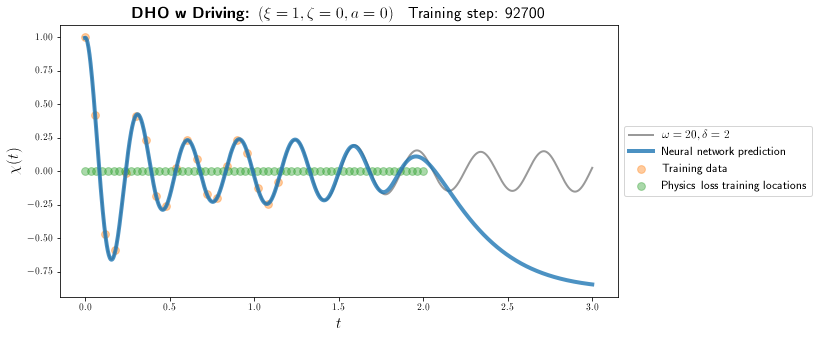

tensor(3.0774e-06, grad_fn=<MeanBackward0>) tensor(0.0005, grad_fn=<MulBackward0>)


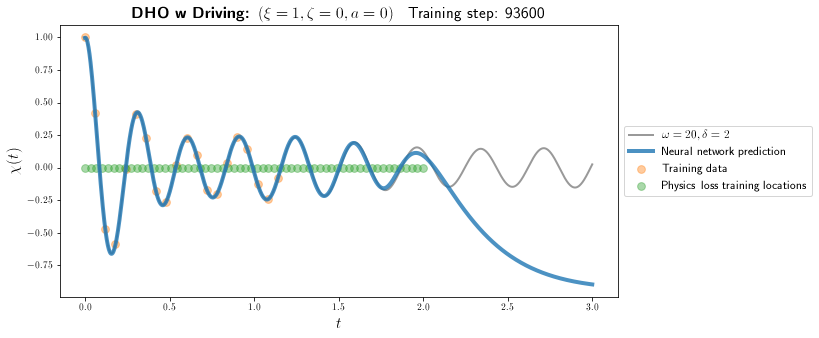

tensor(3.0045e-06, grad_fn=<MeanBackward0>) tensor(0.0004, grad_fn=<MulBackward0>)


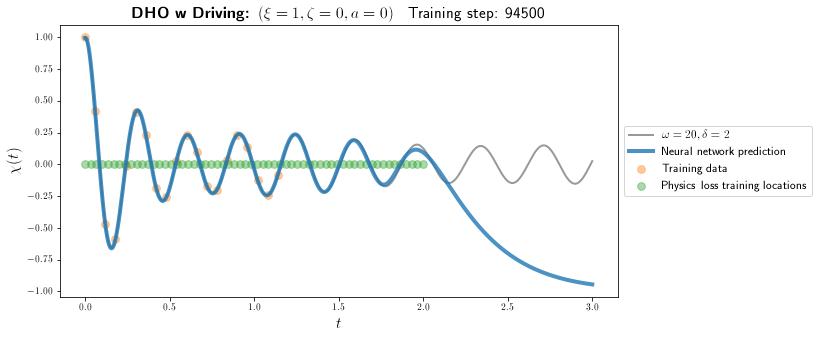

tensor(2.9752e-06, grad_fn=<MeanBackward0>) tensor(0.0004, grad_fn=<MulBackward0>)


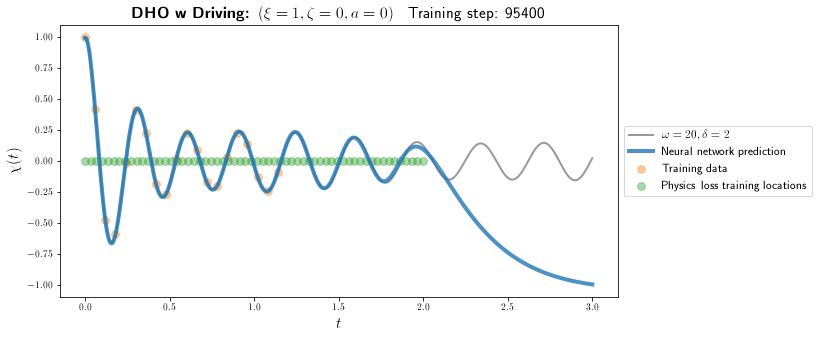

tensor(2.5519e-06, grad_fn=<MeanBackward0>) tensor(0.0004, grad_fn=<MulBackward0>)


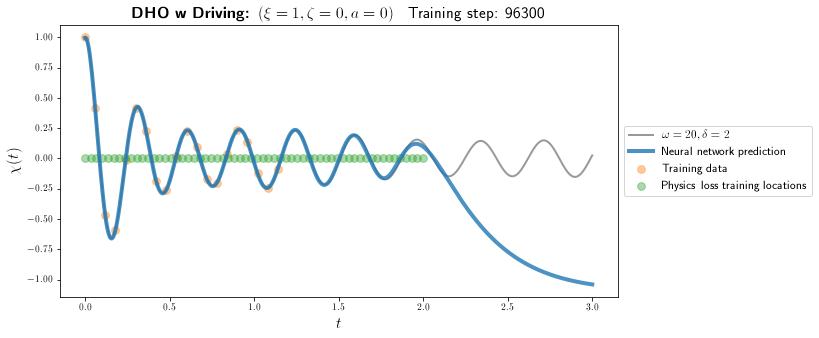

tensor(2.8954e-06, grad_fn=<MeanBackward0>) tensor(0.0003, grad_fn=<MulBackward0>)


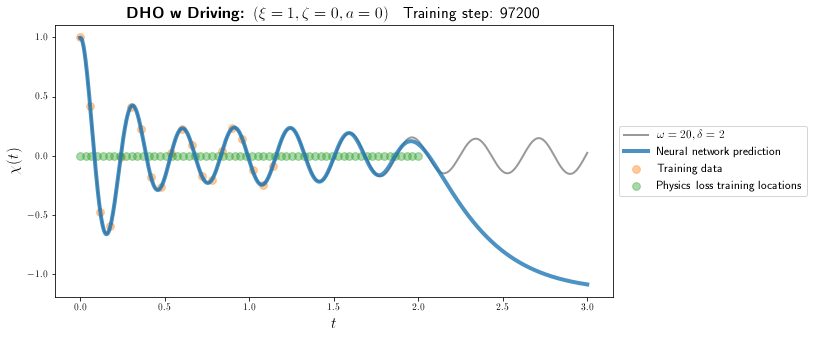

tensor(2.4973e-06, grad_fn=<MeanBackward0>) tensor(0.0003, grad_fn=<MulBackward0>)


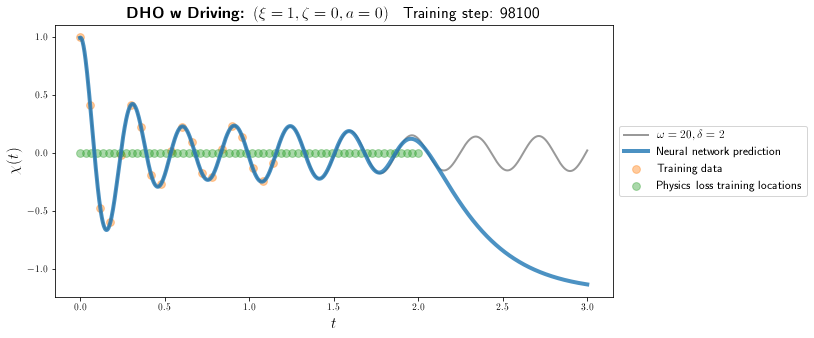

tensor(3.1382e-06, grad_fn=<MeanBackward0>) tensor(0.0003, grad_fn=<MulBackward0>)


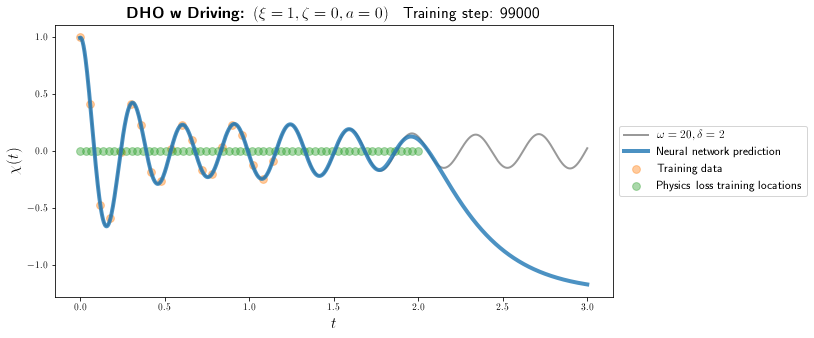

tensor(2.3679e-06, grad_fn=<MeanBackward0>) tensor(0.0002, grad_fn=<MulBackward0>)


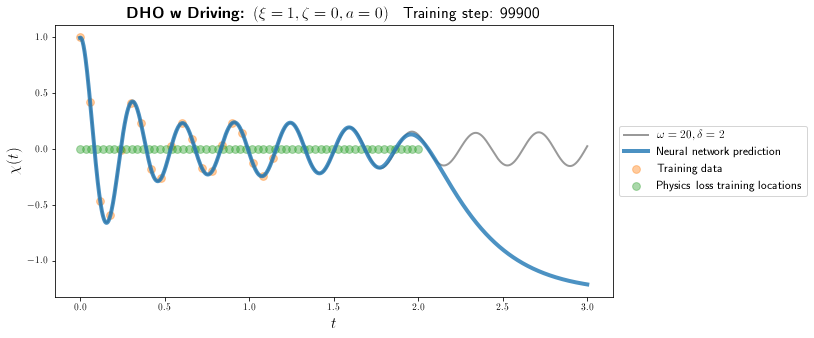

tensor(2.1603e-06, grad_fn=<MeanBackward0>) tensor(0.0002, grad_fn=<MulBackward0>)


In [6]:
# The connected neural network built on the existing code 
# provided by Ben @ (https://github.com/benmoseley/harmonic-oscillator-pinn)
def save_gif_PIL(outfile, files, fps=5, loop=0):
    "Helper function for saving GIFs"
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

class FCN(nn.Module):
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

# A simple plotting function for data visualization
def plot_result(x,y,x_data,y_data,yh,xp):
    plt.figure(figsize=(10,5))
    plt.plot(x, y, color="grey", linewidth=2, alpha=0.8, label='$\omega = 20,\delta =2$')
    plt.plot(x, yh, color="tab:blue", linewidth=4, alpha=0.8, label="Neural network prediction")
    plt.scatter(x_data, y_data, s=60, color="tab:orange", alpha=0.4, label='Training data')
    if xp is not None:
        plt.scatter(xp, -0*torch.ones_like(xp), s=60, color="tab:green", alpha=0.4, 
                    label='Physics loss training locations')
    l = plt.legend(bbox_to_anchor=(1.36,.5),loc = "center right",fontsize=12)
    plt.setp(l.get_texts(), color="k")
    plt.title('\\textbf{DHO w Driving: $(\\xi=1, \\zeta=0, a = 0)$}\hspace{.2in}'"Training step: %i"%(i+1),fontsize=fs)
    plt.xlabel(r'$t$',fontsize=fs)
    plt.ylabel('$\\chi(t)$',fontsize=fs)
    

# sample locations over the problem domain
x_physics = torch.linspace(0., 2., 60).view(-1,1).requires_grad_(True)

torch.manual_seed(123)
model = FCN(1,1,32,3)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)
files = []

for i in range(100000):
    optimizer.zero_grad()
    
    # compute the "data loss"
    yh = model(x_data)
    loss1 = torch.mean((yh-y_data)**2)# use mean squared error
    
    # compute the "physics loss"
    yhp = model(x_physics)
    dx  = torch.autograd.grad(yhp, x_physics, torch.ones_like(yhp), create_graph=True)[0]# computes dy/dx
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]# computes d^2y/dx^2
    # computes the residual of the 1D harmonic oscillator differential equation
    physics = dx2 + mu*dx + k*yhp - a*torch.sin(omegad * x_physics)
    loss2 = (1e-4)*torch.mean(physics**2)

    # backpropagate joint loss
    loss = loss1 + loss2# add two loss terms together
    loss.backward()
    optimizer.step()
    
    # plot the result as training progresses
    if (i+1) % 150 == 0: 
        
        yh = model(x).detach()
        xp = x_physics.detach()
        
        plot_result(x,y,x_data,y_data,yh,xp)
        
        file = "plots/pinn_%.8i.png"%(i+1)
        plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
        files.append(file)

        if (i+1) % 900 == 0: 
            plt.show()
            print(loss1,loss2)
        else: plt.close("all")
            
save_gif_PIL("chaospinn.gif", files, fps=20, loop=0)


<details>
<summary><b>Exact Solution Details</b></summary>

    
For no driving $(a=0)$, Mathematica gives the solution
$$
\begin{equation}
    \chi(t) = e^{-\delta t} \left(\frac{(\delta  \xi +\zeta ) \sin \left(t \sqrt{\omega^2-\delta ^2}\right)}{\sqrt{\omega^2-\delta^2}}+\xi  \cos \left(t \sqrt{\omega^2 - \delta ^2}\right)\right).
\end{equation}
$$
    With driving arbitrary, the solution takes the form
$$
\begin{align}
    \chi(t) &= e^{-t\delta}\left( c_1 e^{-t \sqrt{\delta ^2-\omega ^2}}+c_2 e^{t \sqrt{\delta ^2-\omega ^2}} \right) + \frac{a \left(\omega ^2-f^2\right) \cos (f t)+2 a \delta  f \sin (f t)}{f^4+f^2 \left(4 \delta ^2-2 \omega ^2\right)+\omega ^4}
\end{align}
$$
    where $c_i$ are determined by using the initial data. Note that for oscillatory behavior, we need that $\delta ^2-\omega ^2<0$.
</details>
